# **Telecom X – Parte 2: Predicción de Cancelación (Churn)**

Este proyecto busca desarrollar modelos de machine learning para predecir la probabilidad de que los clientes de Telecom X cancelen sus servicios. El objetivo es identificar patrones clave y factores de riesgo, permitiendo a la empresa implementar estrategias proactivas de retención.

**Acciones principales:**

- Preprocesamiento de datos: Limpieza, codificación y normalización.

- Selección de variables: Análisis de correlación y características relevantes.

- Modelado: Entrenamiento y evaluación de al menos dos modelos de clasificación (ej. Random Forest, XGBoost).

- Interpretación: Métricas de rendimiento e importancia de variables.

- Recomendaciones: Insights estratégicos para reducir la cancelación.

**Resultado esperado:** Pipeline robusto que priorice clientes en riesgo y optimice acciones de retención. 🚀

#🛠️ **1 Preparación de los Datos**

## **$\blacktriangleright$ 1.1 Extracción del Archivo Tratado**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

# Enlace directo de descarga
file_id = "1J6Yhr6Ff1MW5DAsM8gMQf3qT2rTCFMAT"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar y cargar el CSV en un DataFrame
df = pd.read_csv(url)

In [2]:
# Mostrar las primeras filas
df.head()

,ID,evasion,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total
0,0002-orfbo,0.0,female,0,1,1,9,1,0.0,dsl,...,1.0,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30
1,0003-mknfe,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40
2,0004-tlhlj,1.0,male,0,0,0,4,1,0.0,fiber optic,...,0.0,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85
3,0011-igkff,1.0,male,1,1,0,13,1,0.0,fiber optic,...,1.0,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85
4,0013-exchz,1.0,female,1,1,0,3,1,0.0,fiber optic,...,0.0,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   evasion                          7043 non-null   float64
 2   cliente_genero                   7267 non-null   object 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   int64  
 5   cliente_dependientes             7267 non-null   int64  
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   int64  
 8   telefono_lineas_adicionales      6560 non-null   float64
 9   internet_servicio                7267 non-null   object 
 10  internet_seguridad               5686 non-null   float64
 11  internet_respaldo                5686 non-null   float64
 12  internet_proteccion_

## **$\blacktriangleright$ 1.2 Eliminación de Columnas Irrelevantes**

In [4]:
columnas_a_eliminar = [
    "ID",
    "cliente_genero",
    "cliente_tiene_pareja",
]

df_clean = df.drop(columns=columnas_a_eliminar)
df_clean.head()

,evasion,cliente_mayor_edad,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_cargo_mensual,cuenta_cargo_total
0,0.0,0,1,9,1,0.0,dsl,0.0,1.0,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30
1,0.0,0,0,9,1,1.0,dsl,0.0,0.0,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40
2,1.0,0,0,4,1,0.0,fiber optic,0.0,0.0,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85
3,1.0,1,0,13,1,0.0,fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85
4,1.0,1,0,3,1,0.0,fiber optic,0.0,0.0,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40


## **$\blacktriangleright$ 1.3 Encoding**

## $\triangleright$ 1.3.1 Identificación de valores únicos

In [5]:
# Rangos de variables
for columna in df_clean.columns:
    valores_unicos = df_clean[columna].unique()
    print(f"Columna: {columna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}")
    print("-" * 50)

Columna: evasion
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: cliente_mayor_edad
Valores únicos (2): [0 1]
--------------------------------------------------
Columna: cliente_dependientes
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: cliente_antiguedad
Valores únicos (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Columna: telefono_servicio
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: telefono_lineas_adicionales
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: internet_servicio
Valores únicos (3): ['dsl' 'fiber optic' 'no']
--------------------------------------------------
Columna: in

## $\triangleright$ 1.3.2 Variables Categóricas y Método de Encoding

**`internet_servicio`**

- Tipo: Nominal

- Valores Únicos: ['dsl', 'fiber optic', 'no']

- Encoding: One-Hot

- cuenta_contrato

**`cuenta_contrato`**

- Tipo: One-Hot

- Valores Únicos: ['month-to-month', 'one year', 'two year']

- Encoding: One-Hot

**`cuenta_metodo_pago`**

- Tipo: Nominal

- Valores Únicos: ['mailed check', 'electronic check', ...]

- Encoding: One-Hot

## $\triangleright$ 1.3.3 Encoding

In [6]:
# Lista de columnas categóricas a codificar
categorical_cols = [
    'internet_servicio',
    'cuenta_contrato',
    'cuenta_metodo_pago'
]

# Aplicar One-Hot Encoding a todas las columnas categóricas
df_encoded = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    dtype=int  # Para convertir True/False a 1/0
)

In [7]:
# Rangos de variables
for columna in df_encoded.columns:
    valores_unicos = df_encoded[columna].unique()
    print(f"Columna: {columna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}")
    print("-" * 50)

Columna: evasion
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: cliente_mayor_edad
Valores únicos (2): [0 1]
--------------------------------------------------
Columna: cliente_dependientes
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: cliente_antiguedad
Valores únicos (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Columna: telefono_servicio
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: telefono_lineas_adicionales
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: internet_seguridad
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: internet_respa

## **$\blacktriangleright$ 1.4 Verificación de la Proporción de Cancelación (Churn)**

In [8]:
# 1. Conteo de valores (incluyendo nulos si existen)
conteo = df_encoded["evasion"].value_counts(dropna=False)

# 2. Proporción de cancelaciones vs. retención
proporcion = df_encoded["evasion"].value_counts(normalize=True) * 100

print("Conteo de valores:\n", conteo)
print("\nProporción (%):\n", proporcion)

Conteo de valores:
 evasion
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64

Proporción (%):
 evasion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


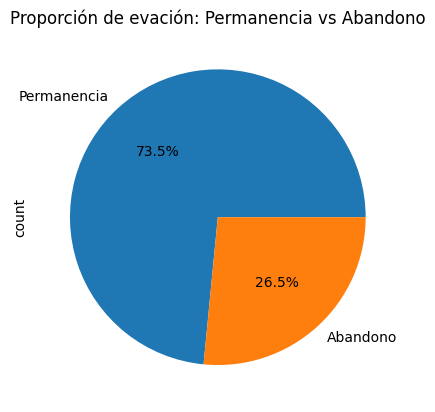

In [9]:
df_encoded["evasion"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["Permanencia", "Abandono"])
plt.title("Proporción de evación: Permanencia vs Abandono")
plt.show()

#🎯 **2 Correlación y Selección de Variables**

## **$\blacktriangleright$ 2.1 Análisis de Correlación**


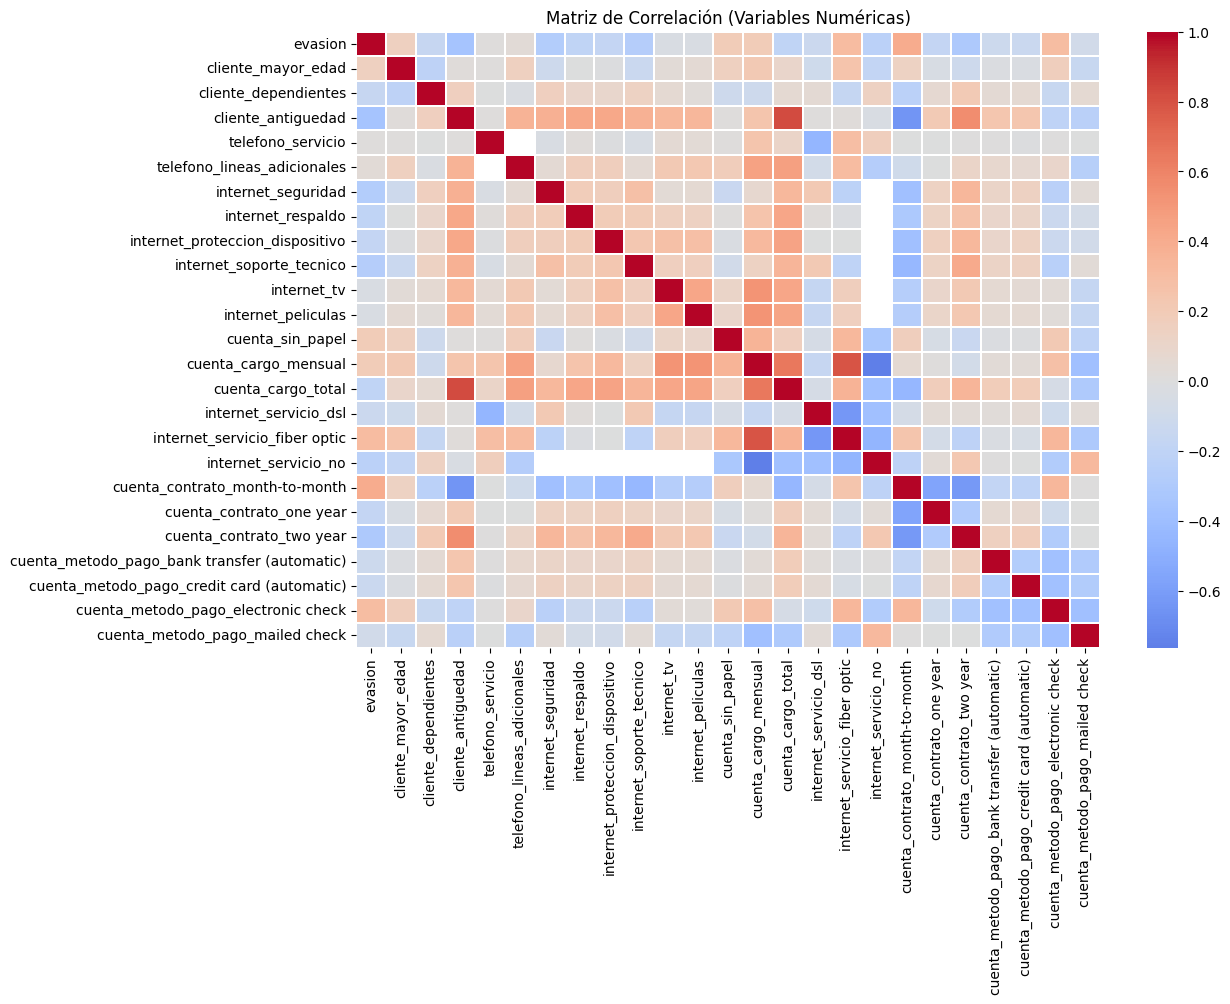

Correlación con 'evasion':
 evasion                                         1.000000
cuenta_contrato_month-to-month                  0.405103
internet_servicio_fiber optic                   0.308020
cuenta_metodo_pago_electronic check             0.301919
cuenta_cargo_mensual                            0.193356
cuenta_sin_papel                                0.191825
cliente_mayor_edad                              0.150889
telefono_lineas_adicionales                     0.040207
telefono_servicio                               0.011942
internet_tv                                    -0.037057
internet_peliculas                             -0.040132
cuenta_metodo_pago_mailed check                -0.091683
cuenta_metodo_pago_bank transfer (automatic)   -0.117937
internet_servicio_dsl                          -0.124214
cuenta_metodo_pago_credit card (automatic)     -0.134302
cliente_dependientes                           -0.164221
internet_proteccion_dispositivo                -0.177125
cue

In [10]:
# 1. Seleccionar solo columnas numéricas
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# 2. Calcular matriz de correlación
corr_matrix = numeric_df.corr()

# 3. Heatmap de correlación (enfocado en 'evasion')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=False,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            linewidths=0.3)
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

# 4. Correlaciones con 'evasion' (ordenadas)
corr_evasion = corr_matrix["evasion"].sort_values(ascending=False)
print("Correlación con 'evasion':\n", corr_evasion)

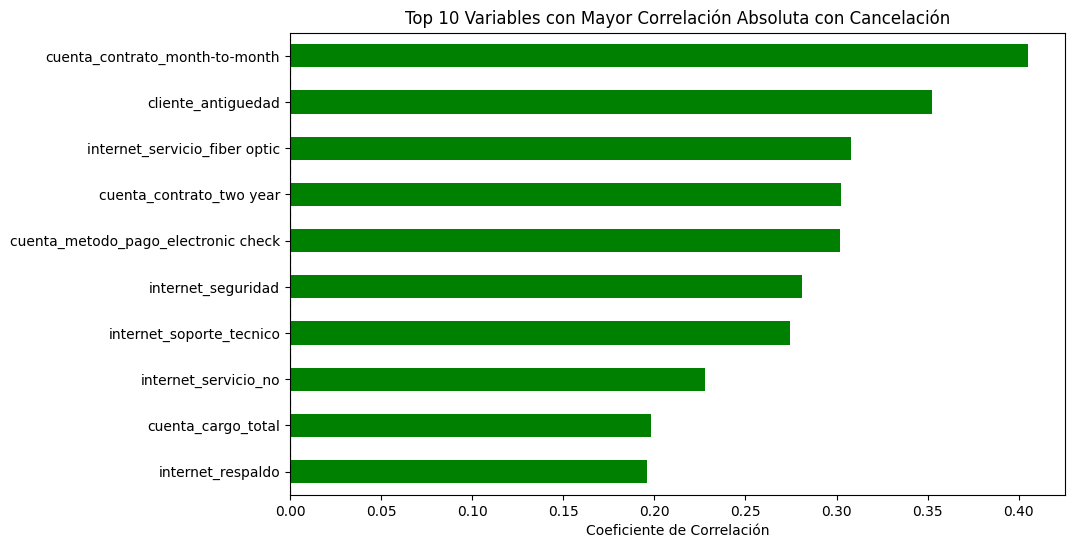

In [11]:
# Filtrar correlaciones absolutas con 'evasion'
top_corr = corr_evasion.drop('evasion').abs().sort_values(ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
top_corr.sort_values().plot.barh(color=['red' if x < 0 else 'green' for x in top_corr])
plt.title("Top 10 Variables con Mayor Correlación Absoluta con Cancelación")
plt.xlabel("Coeficiente de Correlación")
plt.axvline(0, color='black', linestyle='--')
plt.show()

## **$\blacktriangleright$ 2.2 Análisis dirigido**


In [12]:
df_cancelaciones = df_encoded[df_encoded['evasion'] == 1.0]

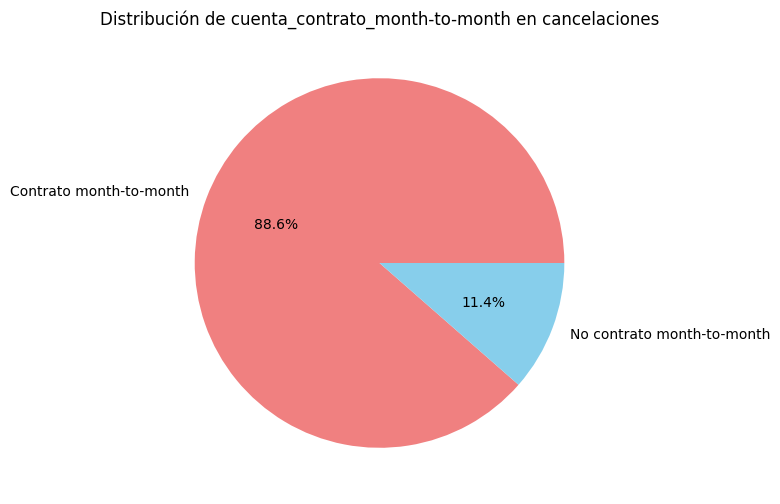

In [13]:
plt.figure(figsize=(6, 6))
df_cancelaciones['cuenta_contrato_month-to-month'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Contrato month-to-month', 'No contrato month-to-month'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de cuenta_contrato_month-to-month en cancelaciones')
plt.ylabel('')
plt.show()

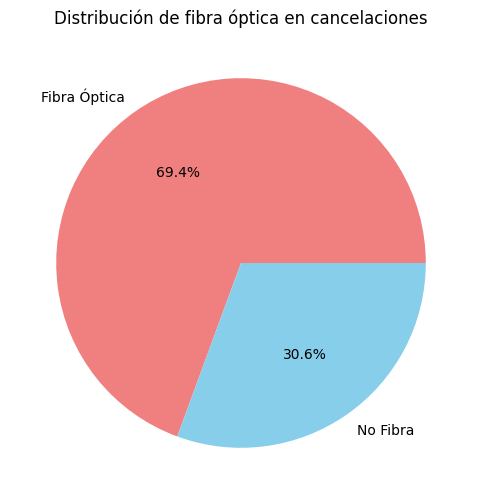

In [14]:
plt.figure(figsize=(6, 6))
df_cancelaciones['internet_servicio_fiber optic'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Fibra Óptica', 'No Fibra'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de fibra óptica en cancelaciones')
plt.ylabel('')
plt.show()

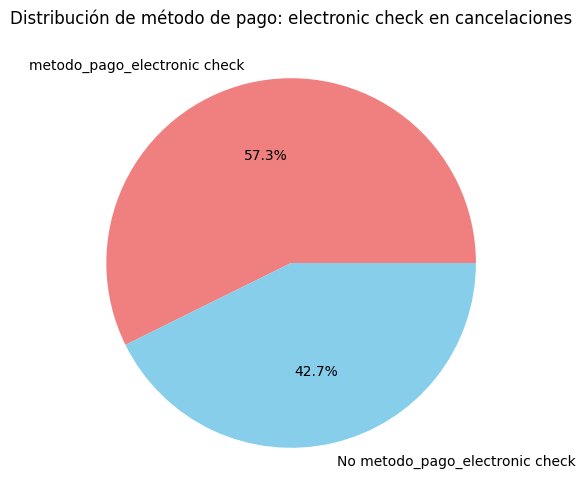

In [15]:
plt.figure(figsize=(6, 6))
df_cancelaciones['cuenta_metodo_pago_electronic check'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['metodo_pago_electronic check', 'No metodo_pago_electronic check'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de método de pago: electronic check en cancelaciones')
plt.ylabel('')
plt.show()

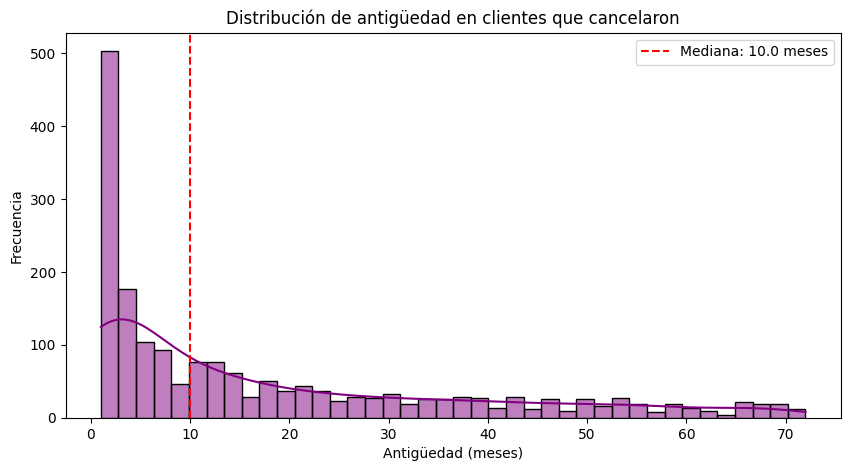

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_cancelaciones,
    x='cliente_antiguedad',
    bins=40,
    kde=True,
    color='purple'
)
plt.title('Distribución de antigüedad en clientes que cancelaron')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Frecuencia')
plt.axvline(
    df_cancelaciones['cliente_antiguedad'].median(),
    color='red',
    linestyle='--',
    label=f'Mediana: {df_cancelaciones["cliente_antiguedad"].median():.1f} meses'
)
plt.legend()
plt.show()

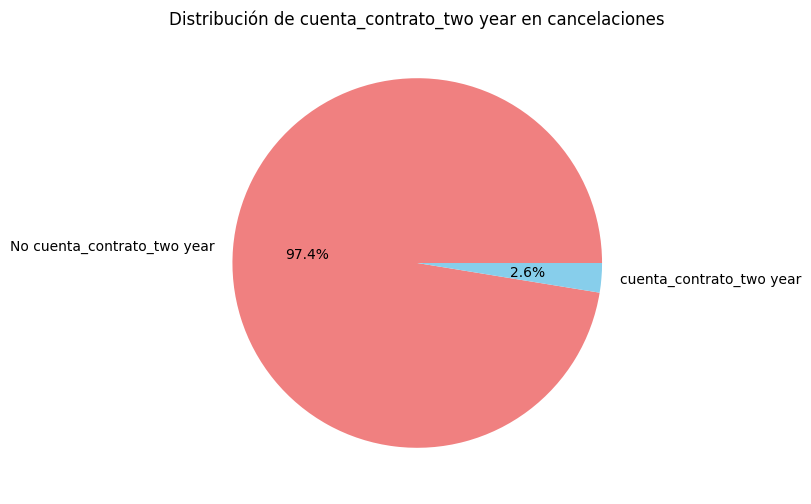

In [17]:
plt.figure(figsize=(6, 6))
df_cancelaciones['cuenta_contrato_two year'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No cuenta_contrato_two year', 'cuenta_contrato_two year'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de cuenta_contrato_two year en cancelaciones')
plt.ylabel('')
plt.show()

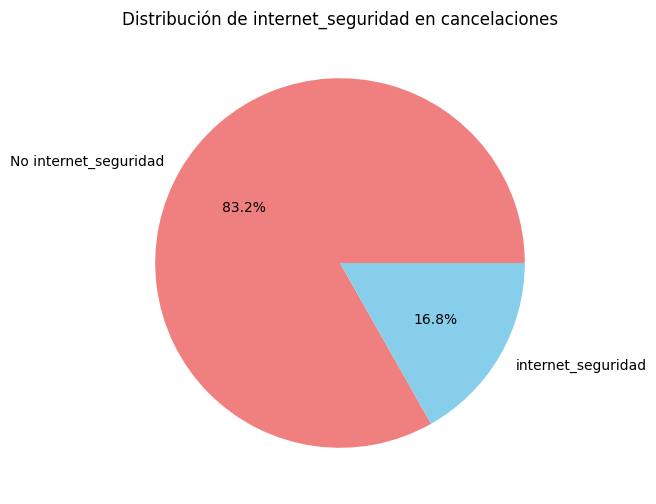

In [18]:
plt.figure(figsize=(6, 6))
df_cancelaciones['internet_seguridad'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No internet_seguridad', 'internet_seguridad'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de internet_seguridad en cancelaciones')
plt.ylabel('')
plt.show()

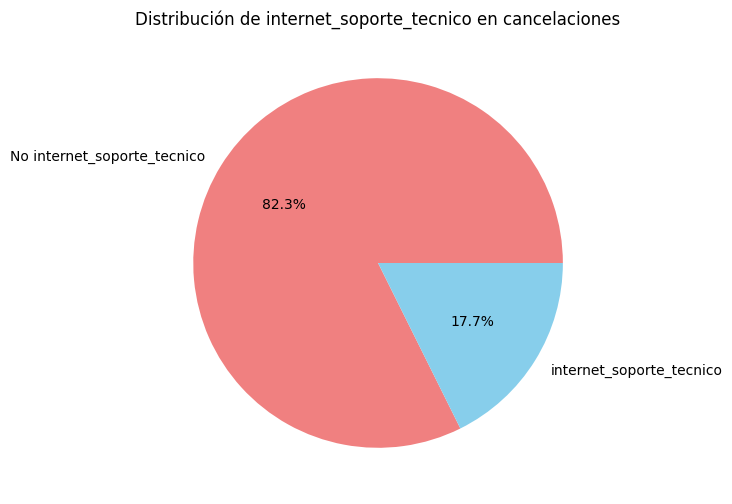

In [19]:
plt.figure(figsize=(6, 6))
df_cancelaciones['internet_soporte_tecnico'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No internet_soporte_tecnico', 'internet_soporte_tecnico'],
    colors=['lightcoral', 'skyblue']
)
plt.title('Distribución de internet_soporte_tecnico en cancelaciones')
plt.ylabel('')
plt.show()

#🤖 **3 Modelado Predictivo**

## **$\blacktriangleright$ 3.1 Separación de Datos**

In [27]:
from sklearn.model_selection import train_test_split

# Definir las características y el campo objetivo
features = [
    'cuenta_contrato_month-to-month',
    'internet_servicio_fiber optic',
    'cuenta_metodo_pago_electronic check',
    'internet_soporte_tecnico',
    'internet_seguridad',
    'cuenta_contrato_two year',
    'cliente_antiguedad'
]

target = 'evasion'

# Crear una lista con todos los campos a verificar (features + target)
campos_completos = features + [target]

print(f"DataFrame original: {len(df_encoded)} registros")

# Filtrar registros sin valores nulos en ninguno de los campos necesarios
df_sin_nulos = df_encoded.dropna(subset=campos_completos)

print(f"DataFrame después de eliminar nulos: {len(df_sin_nulos)} registros")
print(f"Registros eliminados por nulos: {len(df_encoded) - len(df_sin_nulos)}")

# Separar las características (X) y el objetivo (y)
X = df_sin_nulos[features]
y = df_sin_nulos[target]

# Dividir en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,           # 30% para test, 70% para entrenamiento
    random_state=42,         # Para reproducibilidad
    stratify=y               # Mantener la proporción de clases en ambos conjuntos
)

# Mostrar información sobre la división
print(f"\nDivisión de datos:")
print(f"Entrenamiento: {len(X_train)} registros ({len(X_train)/len(df_sin_nulos)*100:.1f}%)")
print(f"Prueba: {len(X_test)} registros ({len(X_test)/len(df_sin_nulos)*100:.1f}%)")

# Verificar la distribución de la variable objetivo
print(f"\nDistribución de 'evasion' en entrenamiento:")
print(y_train.value_counts(normalize=True))

print(f"\nDistribución de 'evasion' en prueba:")
print(y_test.value_counts(normalize=True))

DataFrame original: 7267 registros
DataFrame después de eliminar nulos: 5517 registros
Registros eliminados por nulos: 1750

División de datos:
Entrenamiento: 3861 registros (70.0%)
Prueba: 1656 registros (30.0%)

Distribución de 'evasion' en entrenamiento:
evasion
0.0    0.681689
1.0    0.318311
Name: proportion, dtype: float64

Distribución de 'evasion' en prueba:
evasion
0.0    0.681763
1.0    0.318237
Name: proportion, dtype: float64


## **$\blacktriangleright$ 3.2 Creación de Modelos**

## $\triangleright$ 3.2.1 Modelo 1: Regresión Logística (Requiere Normalización)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

print("=== NORMALIZACIÓN DE DATOS ===")

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
print(f"Escalador ajustado con {X_train_scaled.shape[0]} muestras de entrenamiento")

# Aplicar la misma transformación a los datos de test
X_test_scaled = scaler.transform(X_test)
print(f"Datos de test transformados: {X_test_scaled.shape[0]} muestras")

# Convertir de vuelta a DataFrame para mantener los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

print("\n" + "="*50)
print("=== ENTRENAMIENTO DEL MODELO ===")

# Crear el modelo de Regresión Logística
modelo_lr = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Aumentar iteraciones para asegurar convergencia
    solver='liblinear'  # Buen solver para datasets pequeños-medianos
)

# Entrenar el modelo
modelo_lr.fit(X_train_scaled, y_train)
print(f"✅ Modelo entrenado exitosamente")

=== NORMALIZACIÓN DE DATOS ===
Escalador ajustado con 3861 muestras de entrenamiento
Datos de test transformados: 1656 muestras

=== ENTRENAMIENTO DEL MODELO ===
Modelo entrenado exitosamente


In [29]:
# Realizar predicciones
y_train_pred = modelo_lr.predict(X_train_scaled)
y_test_pred = modelo_lr.predict(X_test_scaled)

## $\triangleright$ 3.2.2 Modelo 2: Random Forest (No Requiere Normalización)

In [32]:
from sklearn.ensemble import RandomForestClassifier

print("=== IMPLEMENTACIÓN RANDOM FOREST ===")
print("(No requiere normalización - usa datos originales)")

# Usar los datos originales sin normalizar (X_train, X_test)
print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

print("\n" + "="*50)
print("=== CONFIGURACIÓN Y ENTRENAMIENTO ===")

# Crear el modelo Random Forest con parámetros optimizados
modelo_rf = RandomForestClassifier(
    n_estimators=100,        # Número de árboles en el bosque
    max_depth=10,            # Profundidad máxima de cada árbol
    min_samples_split=5,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,      # Mínimo de muestras en cada hoja
    max_features='sqrt',     # Número de características a considerar en cada división
    random_state=42,         # Para reproducibilidad
    n_jobs=-1               # Usar todos los procesadores disponibles
)

print(f"Parámetros del modelo:")
print(f"  - Número de árboles: {modelo_rf.n_estimators}")
print(f"  - Profundidad máxima: {modelo_rf.max_depth}")
print(f"  - Características por división: {modelo_rf.max_features}")

# Entrenar el modelo
print(f"\nEntrenando Random Forest...")
modelo_rf.fit(X_train, y_train)
print(f"✅ Modelo entrenado exitosamente")

# Realizar predicciones
y_train_pred_rf = modelo_rf.predict(X_train)
y_test_pred_rf = modelo_rf.predict(X_test)

=== IMPLEMENTACIÓN RANDOM FOREST ===
(No requiere normalización - usa datos originales)
Datos de entrenamiento: (3861, 7)
Datos de prueba: (1656, 7)

=== CONFIGURACIÓN Y ENTRENAMIENTO ===
Parámetros del modelo:
  - Número de árboles: 100
  - Profundidad máxima: 10
  - Características por división: sqrt

Entrenando Random Forest...
✅ Modelo entrenado exitosamente


## **$\blacktriangleright$ 3.3 Evaluación de los Modelos**

## $\triangleright$ 3.3.1 Exactitud (Acurácia)

=== EVALUACIÓN DE EXACTITUD (ACCURACY) ===

📊 RESULTADOS DE EXACTITUD:
Modelo               Entrenamiento   Prueba    
---------------------------------------------
Regresión Logística  0.7615          0.7621    
Random Forest        0.8063          0.7349    


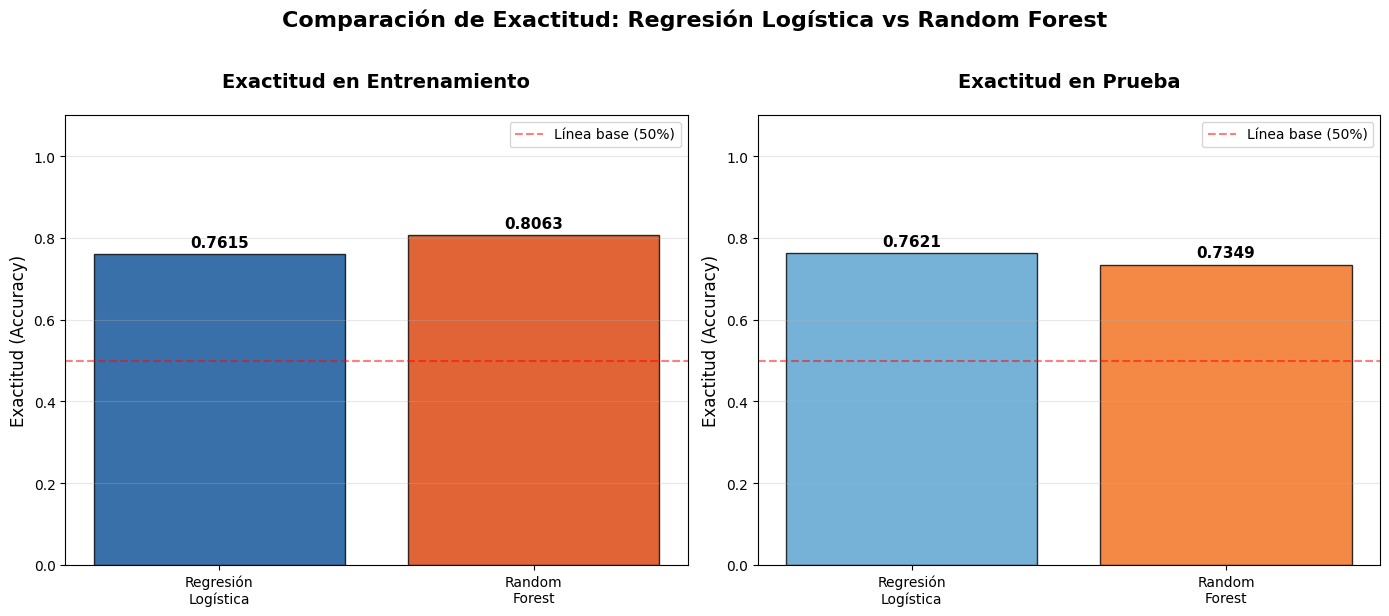

In [57]:
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

print("=== EVALUACIÓN DE EXACTITUD (ACCURACY) ===")

# Calcular exactitud para ambos modelos
# Regresión Logística
train_accuracy_lr = accuracy_score(y_train, y_train_pred)
test_accuracy_lr = accuracy_score(y_test, y_test_pred)

# Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Mostrar valores numéricos
print(f"\n📊 RESULTADOS DE EXACTITUD:")
print(f"{'Modelo':<20} {'Entrenamiento':<15} {'Prueba':<10}")
print(f"{'-'*45}")
print(f"{'Regresión Logística':<20} {train_accuracy_lr:<15.4f} {test_accuracy_lr:<10.4f}")
print(f"{'Random Forest':<20} {train_accuracy_rf:<15.4f} {test_accuracy_rf:<10.4f}")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Datos para los gráficos
modelos = ['Regresión\nLogística', 'Random\nForest']
train_scores = [train_accuracy_lr, train_accuracy_rf]
test_scores = [test_accuracy_lr, test_accuracy_rf]

# Colores para cada modelo
colors_train = ['#084C95', '#D93D04']
colors_test = ['#549FCD', '#F26C16']

# Gráfico 1: Exactitud en Entrenamiento
bars1 = ax1.bar(modelos, train_scores, color=colors_train, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Exactitud en Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Exactitud (Accuracy)', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars1, train_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico 2: Exactitud en Prueba
bars2 = ax2.bar(modelos, test_scores, color=colors_test, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('Exactitud en Prueba', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Exactitud (Accuracy)', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars2, test_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Mejorar el diseño
plt.suptitle('Comparación de Exactitud: Regresión Logística vs Random Forest',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Agregar líneas de referencia (opcional)
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

plt.show()


In [35]:
# Análisis de resultados
print(f"\n=== ANÁLISIS DE RESULTADOS ===")

# Diferencias entre modelos
diff_train = train_accuracy_rf - train_accuracy_lr
diff_test = test_accuracy_rf - test_accuracy_lr

print(f"\n📈 DIFERENCIAS DE RENDIMIENTO:")
print(f"En Entrenamiento: Random Forest {'supera' if diff_train > 0 else 'es inferior'} por {abs(diff_train):.4f}")
print(f"En Prueba: Random Forest {'supera' if diff_test > 0 else 'es inferior'} por {abs(diff_test):.4f}")

# Determinar el mejor modelo
if test_accuracy_rf > test_accuracy_lr:
    mejor_modelo = "Random Forest"
    diferencia = diff_test
elif test_accuracy_lr > test_accuracy_rf:
    mejor_modelo = "Regresión Logística"
    diferencia = -diff_test
else:
    mejor_modelo = "Empate"
    diferencia = 0

print(f"\n🏆 MODELO GANADOR (basado en exactitud de prueba):")
if mejor_modelo == "Empate":
    print(f"   Empate técnico - ambos modelos tienen la misma exactitud")
else:
    print(f"   {mejor_modelo} con una ventaja de {diferencia:.4f} puntos")


=== ANÁLISIS DE RESULTADOS ===

📈 DIFERENCIAS DE RENDIMIENTO:
En Entrenamiento: Random Forest supera por 0.0448
En Prueba: Random Forest es inferior por 0.0272

🏆 MODELO GANADOR (basado en exactitud de prueba):
   Regresión Logística con una ventaja de 0.0272 puntos


## $\triangleright$ 3.3.2 Precisión

=== EVALUACIÓN DE PRECISIÓN ===

📊 RESULTADOS DE PRECISIÓN:
Modelo               Entrenamiento   Prueba    
---------------------------------------------
Regresión Logística  0.6445          0.6412    
Random Forest        0.7115          0.5843    


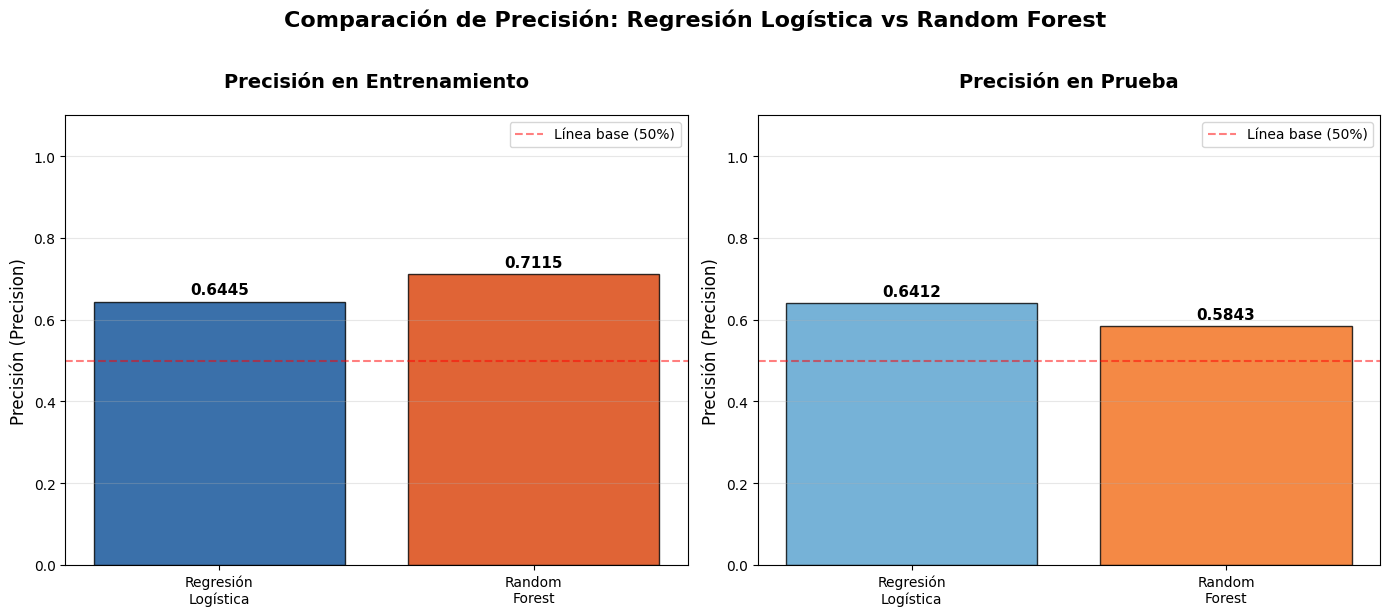

In [56]:
from sklearn.metrics import precision_score

print("=== EVALUACIÓN DE PRECISIÓN ===")

# Calcular precisión para ambos modelos
# Regresión Logística
train_precision_lr = precision_score(y_train, y_train_pred)
test_precision_lr = precision_score(y_test, y_test_pred)

# Random Forest
train_precision_rf = precision_score(y_train, y_train_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)

# Mostrar valores numéricos
print(f"\n📊 RESULTADOS DE PRECISIÓN:")
print(f"{'Modelo':<20} {'Entrenamiento':<15} {'Prueba':<10}")
print(f"{'-'*45}")
print(f"{'Regresión Logística':<20} {train_precision_lr:<15.4f} {test_precision_lr:<10.4f}")
print(f"{'Random Forest':<20} {train_precision_rf:<15.4f} {test_precision_rf:<10.4f}")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Datos para los gráficos
modelos = ['Regresión\nLogística', 'Random\nForest']
train_scores = [train_precision_lr, train_precision_rf]
test_scores = [test_precision_lr, test_precision_rf]

# Colores para cada modelo
colors_train = ['#084C95', '#D93D04']
colors_test = ['#549FCD', '#F26C16']

# Gráfico 1: Precisión en Entrenamiento
bars1 = ax1.bar(modelos, train_scores, color=colors_train, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Precisión en Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Precisión (Precision)', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars1, train_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico 2: Precisión en Prueba
bars2 = ax2.bar(modelos, test_scores, color=colors_test, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('Precisión en Prueba', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Precisión (Precision)', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars2, test_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Mejorar el diseño
plt.suptitle('Comparación de Precisión: Regresión Logística vs Random Forest',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Agregar líneas de referencia (opcional)
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

plt.show()

In [37]:
# Análisis de resultados
print(f"\n=== ANÁLISIS DE RESULTADOS ===")

# Diferencias entre modelos
diff_train = train_precision_rf - train_precision_lr
diff_test = test_precision_rf - test_precision_lr

print(f"\n📈 DIFERENCIAS DE RENDIMIENTO:")
print(f"En Entrenamiento: Random Forest {'supera' if diff_train > 0 else 'es inferior'} por {abs(diff_train):.4f}")
print(f"En Prueba: Random Forest {'supera' if diff_test > 0 else 'es inferior'} por {abs(diff_test):.4f}")

# Determinar el mejor modelo
if test_precision_rf > test_precision_lr:
    mejor_modelo = "Random Forest"
    diferencia = diff_test
elif test_precision_lr > test_precision_rf:
    mejor_modelo = "Regresión Logística"
    diferencia = -diff_test
else:
    mejor_modelo = "Empate"
    diferencia = 0

print(f"\n🏆 MODELO GANADOR (basado en precisión de prueba):")
if mejor_modelo == "Empate":
    print(f"   Empate técnico - ambos modelos tienen la misma precisión")
else:
    print(f"   {mejor_modelo} con una ventaja de {diferencia:.4f} puntos")




=== ANÁLISIS DE RESULTADOS ===

📈 DIFERENCIAS DE RENDIMIENTO:
En Entrenamiento: Random Forest supera por 0.0671
En Prueba: Random Forest es inferior por 0.0569

🏆 MODELO GANADOR (basado en precisión de prueba):
   Regresión Logística con una ventaja de 0.0569 puntos


## $\triangleright$ 3.3.3 Recall

=== EVALUACIÓN DE RECALL ===

📊 RESULTADOS DE RECALL:
Modelo               Entrenamiento   Prueba    
---------------------------------------------
Regresión Logística  0.5590          0.5731    
Random Forest        0.6583          0.5787    


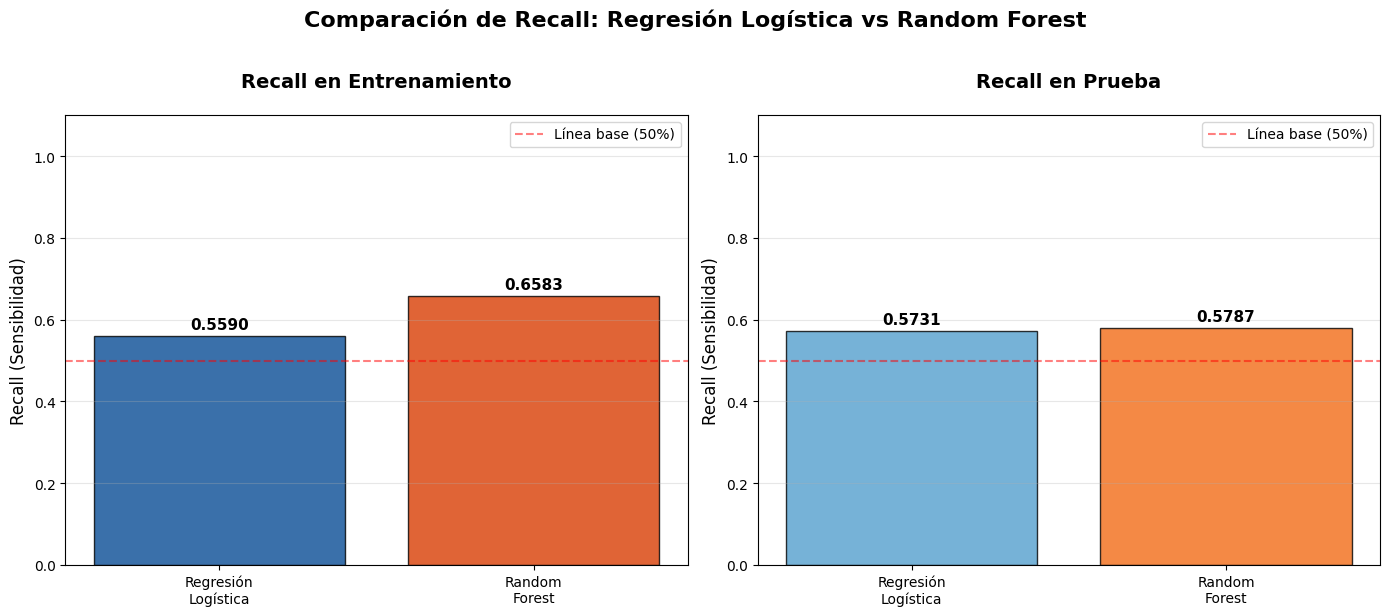

In [55]:
from sklearn.metrics import recall_score

print("=== EVALUACIÓN DE RECALL ===")

# Calcular recall para ambos modelos
# Regresión Logística
train_recall_lr = recall_score(y_train, y_train_pred)
test_recall_lr = recall_score(y_test, y_test_pred)

# Random Forest
train_recall_rf = recall_score(y_train, y_train_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)

# Mostrar valores numéricos
print(f"\n📊 RESULTADOS DE RECALL:")
print(f"{'Modelo':<20} {'Entrenamiento':<15} {'Prueba':<10}")
print(f"{'-'*45}")
print(f"{'Regresión Logística':<20} {train_recall_lr:<15.4f} {test_recall_lr:<10.4f}")
print(f"{'Random Forest':<20} {train_recall_rf:<15.4f} {test_recall_rf:<10.4f}")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Datos para los gráficos
modelos = ['Regresión\nLogística', 'Random\nForest']
train_scores = [train_recall_lr, train_recall_rf]
test_scores = [test_recall_lr, test_recall_rf]

# Colores para cada modelo
colors_train = ['#084C95', '#D93D04']
colors_test = ['#549FCD', '#F26C16']

# Gráfico 1: Recall en Entrenamiento
bars1 = ax1.bar(modelos, train_scores, color=colors_train, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Recall en Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Recall (Sensibilidad)', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars1, train_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico 2: Recall en Prueba
bars2 = ax2.bar(modelos, test_scores, color=colors_test, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('Recall en Prueba', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Recall (Sensibilidad)', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars2, test_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Mejorar el diseño
plt.suptitle('Comparación de Recall: Regresión Logística vs Random Forest',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Agregar líneas de referencia
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

plt.show()

In [41]:
# Análisis de resultados para Recall
print(f"\n=== ANÁLISIS DE RESULTADOS - RECALL ===")

# Diferencias entre modelos
diff_train_recall = train_recall_rf - train_recall_lr
diff_test_recall = test_recall_rf - test_recall_lr

print(f"\n📈 DIFERENCIAS DE RECALL:")
print(f"En Entrenamiento: Random Forest {'supera' if diff_train_recall > 0 else 'es inferior'} por {abs(diff_train_recall):.4f}")
print(f"En Prueba: Random Forest {'supera' if diff_test_recall > 0 else 'es inferior'} por {abs(diff_test_recall):.4f}")

# Determinar el mejor modelo basado en recall
if test_recall_rf > test_recall_lr:
    mejor_modelo_recall = "Random Forest"
    diferencia_recall = diff_test_recall
elif test_recall_lr > test_recall_rf:
    mejor_modelo_recall = "Regresión Logística"
    diferencia_recall = -diff_test_recall
else:
    mejor_modelo_recall = "Empate"
    diferencia_recall = 0

print(f"\n🏆 MODELO GANADOR EN RECALL (basado en prueba):")
if mejor_modelo_recall == "Empate":
    print(f"   Empate técnico - ambos modelos tienen el mismo recall")
else:
    print(f"   {mejor_modelo_recall} con una ventaja de {diferencia_recall:.4f} puntos")


=== ANÁLISIS DE RESULTADOS - RECALL ===

📈 DIFERENCIAS DE RECALL:
En Entrenamiento: Random Forest supera por 0.0993
En Prueba: Random Forest supera por 0.0057

🏆 MODELO GANADOR EN RECALL (basado en prueba):
   Random Forest con una ventaja de 0.0057 puntos


## $\triangleright$ 3.3.4 F1-score

=== EVALUACIÓN DE F1-SCORE ===

📊 RESULTADOS DE F1-SCORE:
Modelo               Entrenamiento   Prueba    
---------------------------------------------
Regresión Logística  0.5987          0.6052    
Random Forest        0.6839          0.5815    


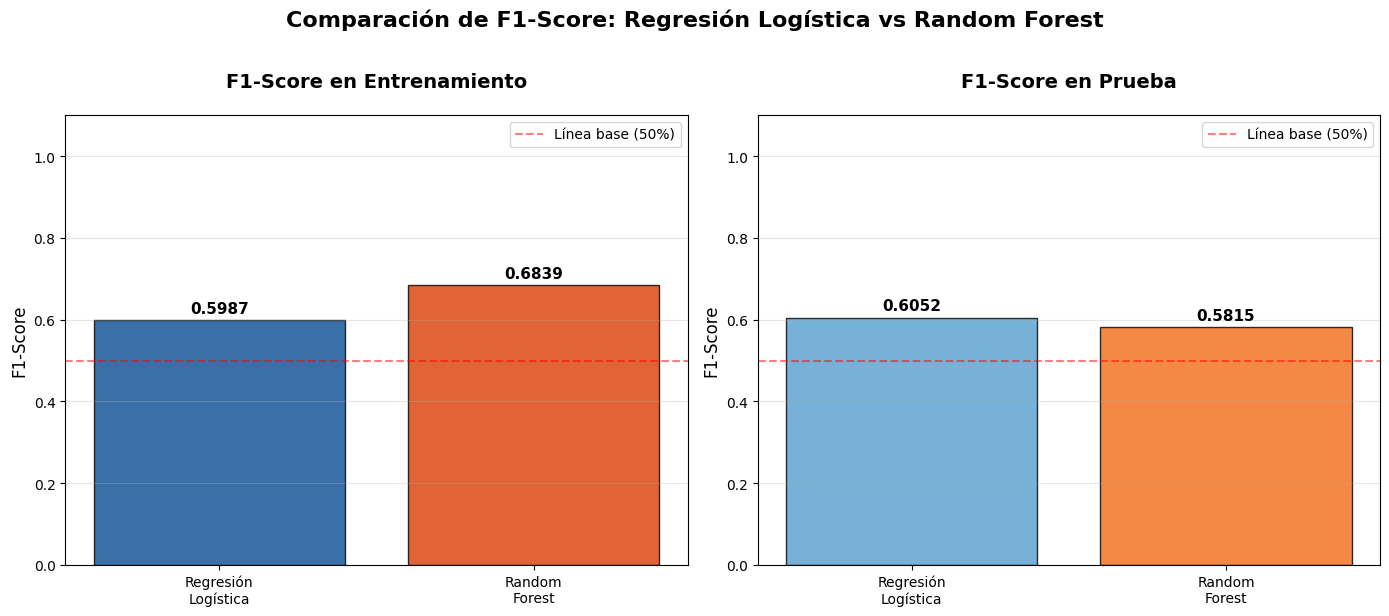

In [54]:
from sklearn.metrics import f1_score

print("=== EVALUACIÓN DE F1-SCORE ===")

# Calcular F1-score para ambos modelos
# Regresión Logística
train_f1_lr = f1_score(y_train, y_train_pred)
test_f1_lr = f1_score(y_test, y_test_pred)

# Random Forest
train_f1_rf = f1_score(y_train, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Mostrar valores numéricos
print(f"\n📊 RESULTADOS DE F1-SCORE:")
print(f"{'Modelo':<20} {'Entrenamiento':<15} {'Prueba':<10}")
print(f"{'-'*45}")
print(f"{'Regresión Logística':<20} {train_f1_lr:<15.4f} {test_f1_lr:<10.4f}")
print(f"{'Random Forest':<20} {train_f1_rf:<15.4f} {test_f1_rf:<10.4f}")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Datos para los gráficos
modelos = ['Regresión\nLogística', 'Random\nForest']
train_scores = [train_f1_lr, train_f1_rf]
test_scores = [test_f1_lr, test_f1_rf]

# Colores para cada modelo
colors_train = ['#084C95', '#D93D04']
colors_test = ['#549FCD', '#F26C16']

# Gráfico 1: F1-Score en Entrenamiento
bars1 = ax1.bar(modelos, train_scores, color=colors_train, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('F1-Score en Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars1, train_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico 2: F1-Score en Prueba
bars2 = ax2.bar(modelos, test_scores, color=colors_test, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('F1-Score en Prueba', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('F1-Score', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, score in zip(bars2, test_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Mejorar el diseño
plt.suptitle('Comparación de F1-Score: Regresión Logística vs Random Forest',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Agregar líneas de referencia
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Línea base (50%)')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

plt.show()

In [42]:
# Análisis de resultados para F1-Score
print(f"\n=== ANÁLISIS DE RESULTADOS - F1-SCORE ===")

# Diferencias entre modelos
diff_train_f1 = train_f1_rf - train_f1_lr
diff_test_f1 = test_f1_rf - test_f1_lr

print(f"\n📈 DIFERENCIAS DE F1-SCORE:")
print(f"En Entrenamiento: Random Forest {'supera' if diff_train_f1 > 0 else 'es inferior'} por {abs(diff_train_f1):.4f}")
print(f"En Prueba: Random Forest {'supera' if diff_test_f1 > 0 else 'es inferior'} por {abs(diff_test_f1):.4f}")

# Determinar el mejor modelo basado en F1-Score
if test_f1_rf > test_f1_lr:
    mejor_modelo_f1 = "Random Forest"
    diferencia_f1 = diff_test_f1
elif test_f1_lr > test_f1_rf:
    mejor_modelo_f1 = "Regresión Logística"
    diferencia_f1 = -diff_test_f1
else:
    mejor_modelo_f1 = "Empate"
    diferencia_f1 = 0

print(f"\n🏆 MODELO GANADOR EN F1-SCORE (basado en prueba):")
if mejor_modelo_f1 == "Empate":
    print(f"   Empate técnico - ambos modelos tienen el mismo F1-Score")
else:
    print(f"   {mejor_modelo_f1} con una ventaja de {diferencia_f1:.4f} puntos")


=== ANÁLISIS DE RESULTADOS - F1-SCORE ===

📈 DIFERENCIAS DE F1-SCORE:
En Entrenamiento: Random Forest supera por 0.0852
En Prueba: Random Forest es inferior por 0.0237

🏆 MODELO GANADOR EN F1-SCORE (basado en prueba):
   Regresión Logística con una ventaja de 0.0237 puntos


## $\triangleright$ 3.3.5 Matriz de confusión

=== MATRICES DE CONFUSIÓN Y ANÁLISIS COMPLETO ===


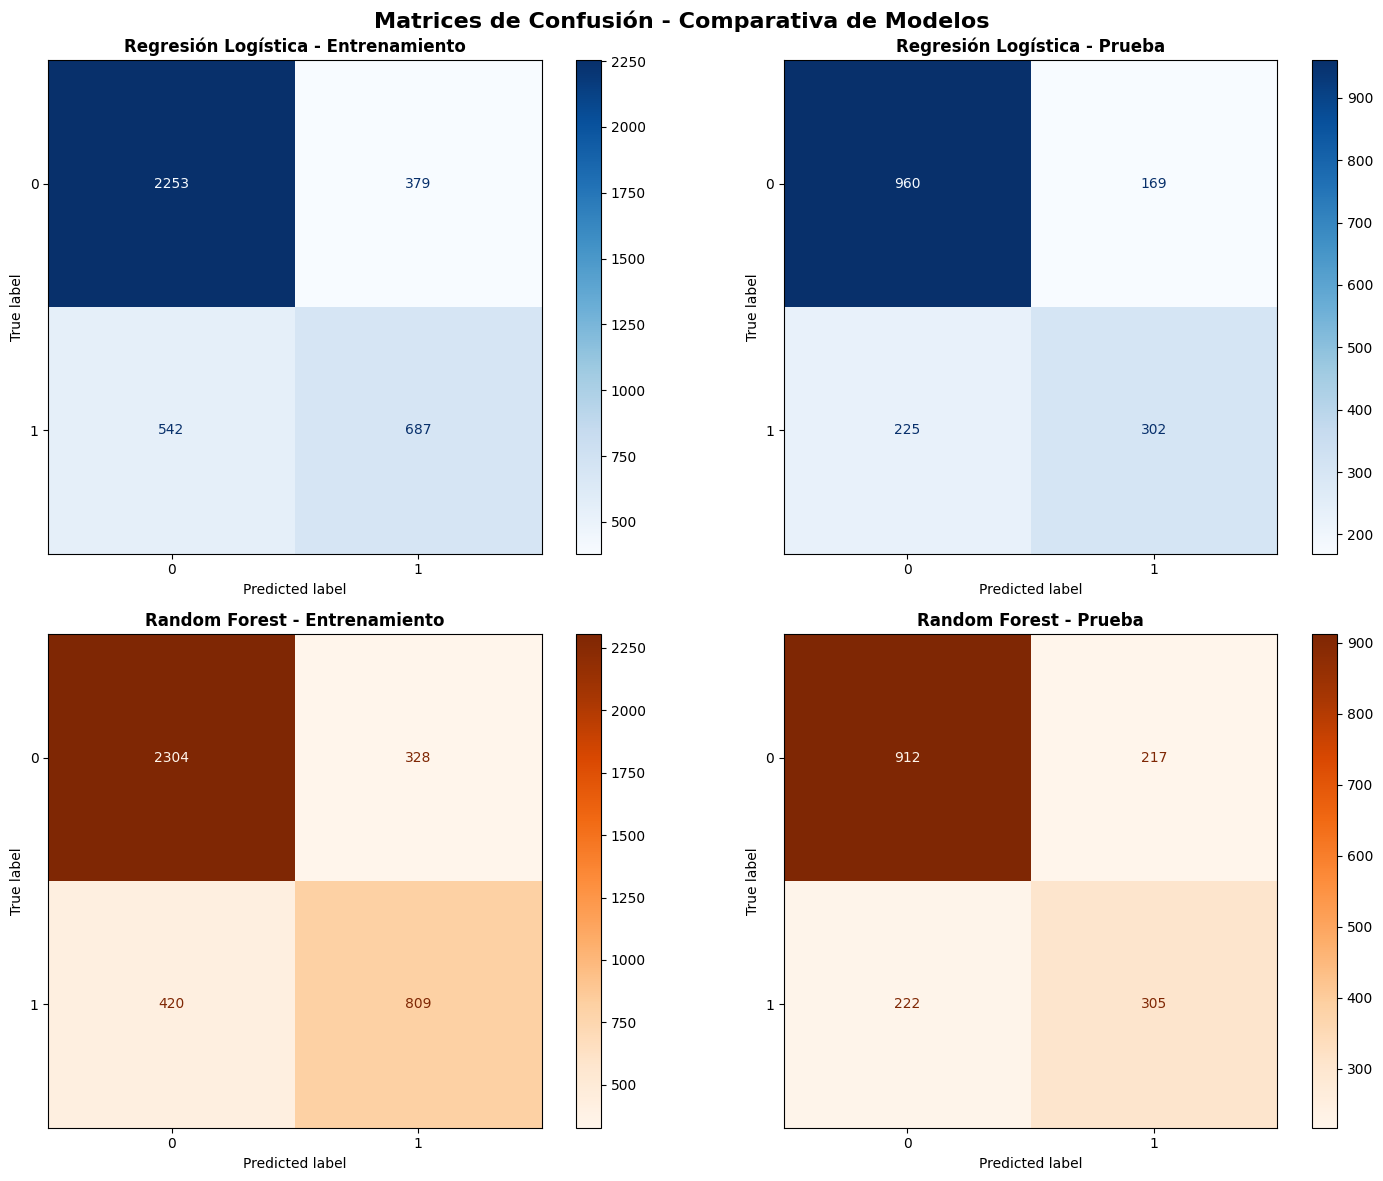


🔍 ANÁLISIS DE MATRICES DE CONFUSIÓN

=== MÉTRICAS CALCULADAS DESDE MATRICES ===

Regresión Logística - Entrenamiento:
  Verdaderos Positivos: 687
  Falsos Positivos: 379
  Falsos Negativos: 542
  Verdaderos Negativos: 2253
  Precisión: 0.6445
  Recall: 0.5590
  F1-Score: 0.5987

Regresión Logística - Prueba:
  Verdaderos Positivos: 302
  Falsos Positivos: 169
  Falsos Negativos: 225
  Verdaderos Negativos: 960
  Precisión: 0.6412
  Recall: 0.5731
  F1-Score: 0.6052

Random Forest - Entrenamiento:
  Verdaderos Positivos: 809
  Falsos Positivos: 328
  Falsos Negativos: 420
  Verdaderos Negativos: 2304
  Precisión: 0.7115
  Recall: 0.6583
  F1-Score: 0.6839

Random Forest - Prueba:
  Verdaderos Positivos: 305
  Falsos Positivos: 217
  Falsos Negativos: 222
  Verdaderos Negativos: 912
  Precisión: 0.5843
  Recall: 0.5787
  F1-Score: 0.5815


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("=== MATRICES DE CONFUSIÓN Y ANÁLISIS COMPLETO ===")

# Matrices de confusión para Regresión Logística
cm_train_lr = confusion_matrix(y_train, y_train_pred)
cm_test_lr = confusion_matrix(y_test, y_test_pred)

# Matrices de confusión para Random Forest
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Visualización de matrices de confusión
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Regresión Logística - Entrenamiento
disp_lr_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_lr)
disp_lr_train.plot(ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Regresión Logística - Entrenamiento', fontweight='bold')

# Regresión Logística - Prueba
disp_lr_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_lr)
disp_lr_test.plot(ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Regresión Logística - Prueba', fontweight='bold')

# Random Forest - Entrenamiento
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf)
disp_rf_train.plot(ax=axes[1, 0], cmap='Oranges')
axes[1, 0].set_title('Random Forest - Entrenamiento', fontweight='bold')

# Random Forest - Prueba
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf)
disp_rf_test.plot(ax=axes[1, 1], cmap='Oranges')
axes[1, 1].set_title('Random Forest - Prueba', fontweight='bold')

plt.suptitle('Matrices de Confusión - Comparativa de Modelos', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Análisis detallado de las matrices de confusión
print(f"\n🔍 ANÁLISIS DE MATRICES DE CONFUSIÓN")

# Función para calcular métricas desde la matriz de confusión
def analizar_matriz_confusion(cm, nombre_modelo, dataset):
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\n{nombre_modelo} - {dataset}:")
    print(f"  Verdaderos Positivos: {tp}")
    print(f"  Falsos Positivos: {fp}")
    print(f"  Falsos Negativos: {fn}")
    print(f"  Verdaderos Negativos: {tn}")
    print(f"  Precisión: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    return precision, recall, f1

# Calcular métricas desde matrices de confusión
print(f"\n=== MÉTRICAS CALCULADAS DESDE MATRICES ===")

prec_train_lr, rec_train_lr, f1_train_lr = analizar_matriz_confusion(cm_train_lr, "Regresión Logística", "Entrenamiento")
prec_test_lr, rec_test_lr, f1_test_lr = analizar_matriz_confusion(cm_test_lr, "Regresión Logística", "Prueba")
prec_train_rf, rec_train_rf, f1_train_rf = analizar_matriz_confusion(cm_train_rf, "Random Forest", "Entrenamiento")
prec_test_rf, rec_test_rf, f1_test_rf = analizar_matriz_confusion(cm_test_rf, "Random Forest", "Prueba")

## **$\blacktriangleright$ 3.4 Análisis**

## $\triangleright$ 3.4.1 Análisis Comparativo de Modelos

###🏆 ¿Cuál modelo tuvo el mejor desempeño?

En datos de prueba (el más importante):

- Exactitud: Regresión Logística (76.21% vs 73.49%)

- Precisión: Regresión Logística (64.12% vs 58.43%)

- Recall: Random Forest (57.87% vs 57.31%) - Muy similar

- F1-Score: Regresión Logística (60.52% vs 58.15%)

***Conclusión:*** La Regresión Logística tiene mejor desempeño general en datos de prueba, ganando en 3 de las 4 métricas principales.


## $\triangleright$ 3.4.2 Análisis de Overfitting/Underfitting

###📊 Brecha significativa entrenamiento vs prueba:

- Exactitud: 80.63% → 73.49% (diferencia de 7.14%)

- Precisión: 71.15% → 58.43% (diferencia de 12.72%)

- F1-Score: 68.39% → 58.15% (diferencia de 10.24%)

###🚨 Causas probables del overfitting en Random Forest:

- Árboles demasiado profundos

- Demasiados estimadores (n_estimators muy alto)

- Poca poda (min_samples_split o min_samples_leaf muy bajos)

- Sin límites de profundidad máxima

###📊 Regresión Logística - LEVE OVERFITTING: Diferencias mínimas

- Exactitud: 76.15% → 76.21% (mejoró ligeramente)

- Precisión: 64.45% → 64.12% (diferencia de 0.33%)

- Recall: 55.90% → 57.31% (mejoró)

***Conclusión:*** La Regresión Logística generaliza mucho mejor

#📋 **4 Interpretación y Conclusiones**

## **$\blacktriangleright$ 4.1 Análisis de la Importancia de las Variables**

=== ANÁLISIS DE VARIABLES RELEVANTES ===

📊 REGRESIÓN LOGÍSTICA - COEFICIENTES DE VARIABLES

🔝 TOP 10 VARIABLES MÁS RELEVANTES (Regresión Logística):
                           Variable  Coeficiente  Abs_Coeficiente
                 cliente_antiguedad    -0.681277         0.681277
      internet_servicio_fiber optic     0.504142         0.504142
     cuenta_contrato_month-to-month     0.363195         0.363195
cuenta_metodo_pago_electronic check     0.216480         0.216480
                 internet_seguridad    -0.191726         0.191726
           internet_soporte_tecnico    -0.170654         0.170654
           cuenta_contrato_two year    -0.159846         0.159846


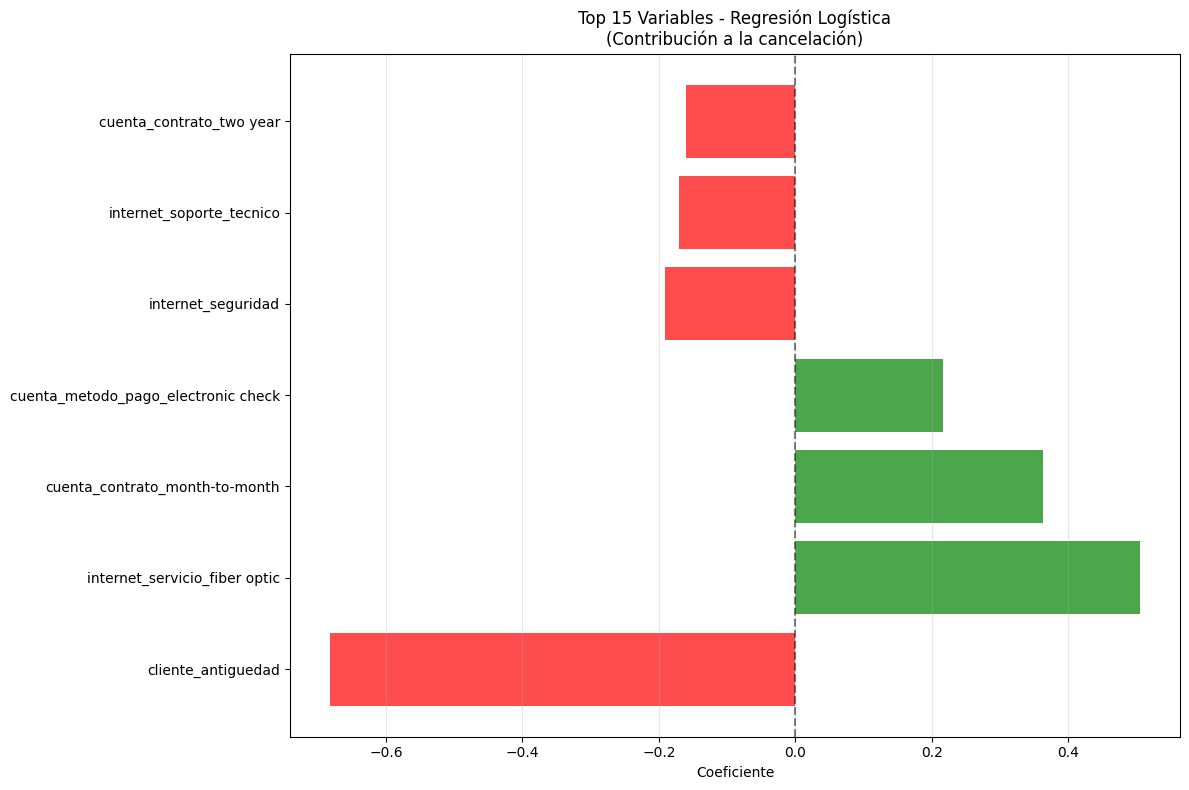


📝 INTERPRETACIÓN REGRESIÓN LOGÍSTICA:
Coeficientes POSITIVOS: Aumentan la probabilidad de CANCELACIÓN
Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelación (aumentan la RETENCIÓN)

🌳 RANDOM FOREST - IMPORTANCIA DE VARIABLES

🔝 TOP 10 VARIABLES MÁS RELEVANTES (Random Forest):
                           Variable  Importancia
                 cliente_antiguedad     0.517794
     cuenta_contrato_month-to-month     0.182760
      internet_servicio_fiber optic     0.094179
                 internet_seguridad     0.056007
cuenta_metodo_pago_electronic check     0.054289
           cuenta_contrato_two year     0.048493
           internet_soporte_tecnico     0.046477


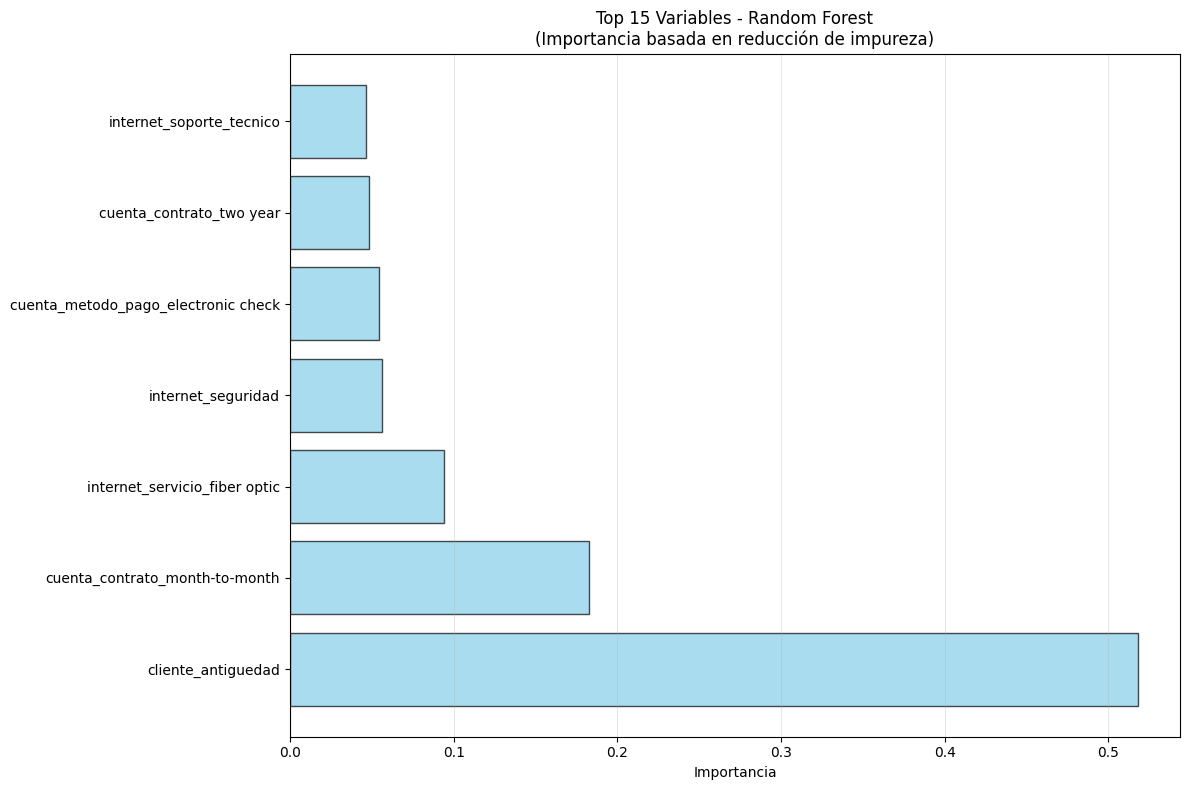


🔄 IMPORTANCIA POR PERMUTACIÓN - REGRESIÓN LOGÍSTICA

🔝 TOP 10 VARIABLES (Importancia por Permutación - LR):
                           Variable  Importancia_Permutacion  Desviacion_Permutacion
     cuenta_contrato_month-to-month                      0.0                     0.0
      internet_servicio_fiber optic                      0.0                     0.0
cuenta_metodo_pago_electronic check                      0.0                     0.0
           internet_soporte_tecnico                      0.0                     0.0
                 internet_seguridad                      0.0                     0.0
           cuenta_contrato_two year                      0.0                     0.0
                 cliente_antiguedad                      0.0                     0.0

🔄 COMPARACIÓN DE VARIABLES RELEVANTES ENTRE MODELOS

🔝 TOP 10 REGRESIÓN LOGÍSTICA (Coeficientes):
                           Variable  Rank_LR
                 cliente_antiguedad      1.0
      internet_servici

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


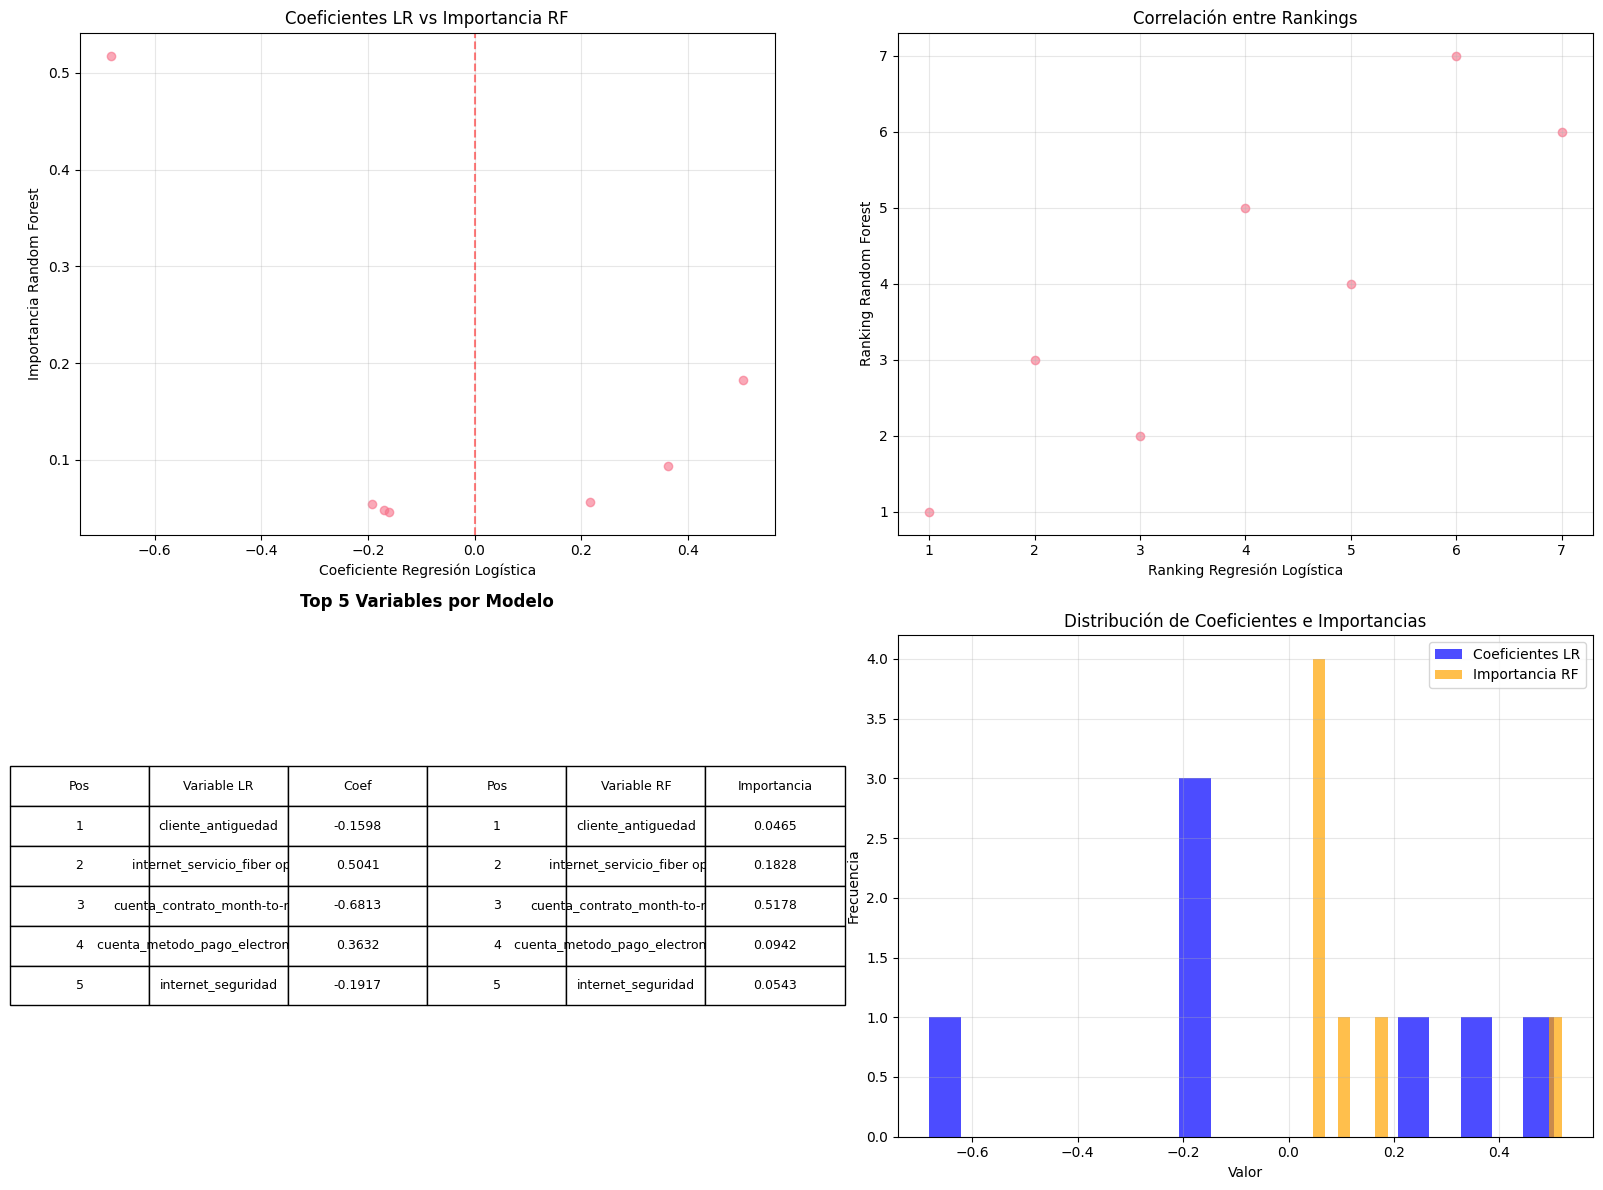


📋 RESUMEN EJECUTIVO
1. Regresión Logística: Muestra dirección y magnitud de impacto
2. Random Forest: Muestra importancia basada en reducción de impureza
3. Variables comunes: Son las más robustas para la predicción
4. Coeficientes positivos: Factores de riesgo de cancelación
5. Coeficientes negativos: Factores protectores de retención


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

print("=== ANÁLISIS DE VARIABLES RELEVANTES ===")

# 1. ANÁLISIS PARA REGRESIÓN LOGÍSTICA (COEFICIENTES)
print("\n" + "="*60)
print("📊 REGRESIÓN LOGÍSTICA - COEFICIENTES DE VARIABLES")
print("="*60)

# Obtener coeficientes del modelo de regresión logística
coeficientes = modelo_lr.coef_[0]
feature_names = X_train.columns

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes,
    'Abs_Coeficiente': np.abs(coeficientes)
})

# Ordenar por importancia absoluta
coef_df = coef_df.sort_values('Abs_Coeficiente', ascending=False)

print("\n🔝 TOP 10 VARIABLES MÁS RELEVANTES (Regresión Logística):")
print(coef_df.head(10).to_string(index=False))

# Visualización de coeficientes
plt.figure(figsize=(12, 8))
top_coef = coef_df.head(15)
colors = ['red' if coef < 0 else 'green' for coef in top_coef['Coeficiente']]

plt.barh(top_coef['Variable'], top_coef['Coeficiente'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Coeficiente')
plt.title('Top 15 Variables - Regresión Logística\n(Contribución a la cancelación)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación de coeficientes
print(f"\n📝 INTERPRETACIÓN REGRESIÓN LOGÍSTICA:")
print("Coeficientes POSITIVOS: Aumentan la probabilidad de CANCELACIÓN")
print("Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelación (aumentan la RETENCIÓN)")

# 2. ANÁLISIS PARA RANDOM FOREST (IMPORTANCIA DE VARIABLES)
print("\n" + "="*60)
print("🌳 RANDOM FOREST - IMPORTANCIA DE VARIABLES")
print("="*60)

# Obtener importancia de variables del Random Forest
importancias = modelo_rf.feature_importances_

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancias
})

# Ordenar por importancia
importance_df = importance_df.sort_values('Importancia', ascending=False)

print("\n🔝 TOP 10 VARIABLES MÁS RELEVANTES (Random Forest):")
print(importance_df.head(10).to_string(index=False))

# Visualización de importancias
plt.figure(figsize=(12, 8))
top_importance = importance_df.head(15)

plt.barh(top_importance['Variable'], top_importance['Importancia'],
         color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Importancia')
plt.title('Top 15 Variables - Random Forest\n(Importancia basada en reducción de impureza)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. IMPORTANCIA POR PERMUTACIÓN PARA REGRESIÓN LOGÍSTICA (OPCIONAL)
print("\n" + "="*60)
print("🔄 IMPORTANCIA POR PERMUTACIÓN - REGRESIÓN LOGÍSTICA")
print("="*60)

# Calcular importancia por permutación para regresión logística
perm_importance = permutation_importance(
    modelo_lr, X_test, y_test, n_repeats=10, random_state=42
)

# Crear DataFrame con importancia por permutación
perm_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia_Permutacion': perm_importance.importances_mean,
    'Desviacion_Permutacion': perm_importance.importances_std
})

# Ordenar por importancia
perm_df = perm_df.sort_values('Importancia_Permutacion', ascending=False)

print("\n🔝 TOP 10 VARIABLES (Importancia por Permutación - LR):")
print(perm_df.head(10).to_string(index=False))

# 4. COMPARACIÓN ENTRE MODELOS
print("\n" + "="*60)
print("🔄 COMPARACIÓN DE VARIABLES RELEVANTES ENTRE MODELOS")
print("="*60)

# Crear DataFrame comparativo
comparison_df = pd.DataFrame({
    'Variable': feature_names,
    'Coef_LR': coef_df['Coeficiente'].values,
    'Rank_LR': coef_df['Abs_Coeficiente'].rank(ascending=False),
    'Importance_RF': importance_df['Importancia'].values,
    'Rank_RF': importance_df['Importancia'].rank(ascending=False),
    'Importance_Perm_LR': perm_df['Importancia_Permutacion'].values,
    'Rank_Perm_LR': perm_df['Importancia_Permutacion'].rank(ascending=False)
})

# Top 10 de cada modelo
top_lr_coef = comparison_df.nsmallest(10, 'Rank_LR')[['Variable', 'Rank_LR']]
top_lr_perm = comparison_df.nsmallest(10, 'Rank_Perm_LR')[['Variable', 'Rank_Perm_LR']]
top_rf = comparison_df.nsmallest(10, 'Rank_RF')[['Variable', 'Rank_RF']]

print("\n🔝 TOP 10 REGRESIÓN LOGÍSTICA (Coeficientes):")
print(top_lr_coef.to_string(index=False))

print("\n🔝 TOP 10 REGRESIÓN LOGÍSTICA (Permutación):")
print(top_lr_perm.to_string(index=False))

print("\n🔝 TOP 10 RANDOM FOREST:")
print(top_rf.to_string(index=False))

# Variables en común en los top 10
common_vars_coef_rf = set(top_lr_coef['Variable']).intersection(set(top_rf['Variable']))
common_vars_perm_rf = set(top_lr_perm['Variable']).intersection(set(top_rf['Variable']))

print(f"\n✅ VARIABLES IMPORTANTES EN AMBOS MODELOS (Coef LR vs RF):")
for var in common_vars_coef_rf:
    print(f"  - {var}")

print(f"\n✅ VARIABLES IMPORTANTES EN AMBOS MODELOS (Permutación LR vs RF):")
for var in common_vars_perm_rf:
    print(f"  - {var}")

# 5. ANÁLISIS DE CORRELACIÓN ENTRE RANKINGS
correlation_coef_rf = comparison_df['Rank_LR'].corr(comparison_df['Rank_RF'])
correlation_perm_rf = comparison_df['Rank_Perm_LR'].corr(comparison_df['Rank_RF'])

print(f"\n📊 CORRELACIÓN ENTRE RANKINGS:")
print(f"Coeficientes LR vs RF: {correlation_coef_rf:.3f}")
print(f"Permutación LR vs RF: {correlation_perm_rf:.3f}")

# 6. RECOMENDACIONES BASADAS EN EL ANÁLISIS
print("\n" + "="*60)
print("🎯 RECOMENDACIONES E INSIGHTS")
print("="*60)

print("\n🔍 VARIABLES CLAVE IDENTIFICADAS (Coeficientes LR):")
for i, var in enumerate(common_vars_coef_rf, 1):
    coef_val = comparison_df[comparison_df['Variable'] == var]['Coef_LR'].values[0]
    importance_val = comparison_df[comparison_df['Variable'] == var]['Importance_RF'].values[0]

    efecto = "CANCELACIÓN" if coef_val > 0 else "RETENCIÓN"
    print(f"{i}. {var}:")
    print(f"   - Coeficiente LR: {coef_val:.4f} ({efecto})")
    print(f"   - Importancia RF: {importance_val:.4f}")

print(f"\n💡 INSIGHTS PARA ACCIÓN:")
print("- Variables con coeficiente positivo: factores de riesgo de cancelación")
print("- Variables con coeficiente negativo: factores protectores de retención")
print("- Variables importantes en ambos modelos: prioridad máxima de acción")
print("- Validar con el área de negocio el significado de estas variables")

# 7. VISUALIZACIÓN COMPARATIVA FINAL
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot: Coeficientes LR vs Importancia RF
scatter1 = axes[0, 0].scatter(comparison_df['Coef_LR'], comparison_df['Importance_RF'], alpha=0.6)
axes[0, 0].set_xlabel('Coeficiente Regresión Logística')
axes[0, 0].set_ylabel('Importancia Random Forest')
axes[0, 0].set_title('Coeficientes LR vs Importancia RF')
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot: Rankings LR vs RF
scatter2 = axes[0, 1].scatter(comparison_df['Rank_LR'], comparison_df['Rank_RF'], alpha=0.6)
axes[0, 1].set_xlabel('Ranking Regresión Logística')
axes[0, 1].set_ylabel('Ranking Random Forest')
axes[0, 1].set_title('Correlación entre Rankings')
axes[0, 1].grid(True, alpha=0.3)

# Top variables comparativas
top_vars_combined = pd.concat([
    comparison_df.nsmallest(5, 'Rank_LR')[['Variable', 'Coef_LR']],
    comparison_df.nsmallest(5, 'Rank_RF')[['Variable', 'Importance_RF']]
], axis=1)

axes[1, 0].axis('off')
axes[1, 0].set_title('Top 5 Variables por Modelo', fontweight='bold', pad=20)

table_data = []
for i in range(5):
    row_data = [
        f"{i+1}",
        top_vars_combined.iloc[i, 0] if i < len(top_vars_combined) else "-",
        f"{top_vars_combined.iloc[i, 1]:.4f}" if i < len(top_vars_combined) else "-",
        f"{i+1}",
        top_vars_combined.iloc[i, 2] if i < len(top_vars_combined) else "-",
        f"{top_vars_combined.iloc[i, 3]:.4f}" if i < len(top_vars_combined) else "-"
    ]
    table_data.append(row_data)

table = axes[1, 0].table(cellText=table_data,
                        colLabels=['Pos', 'Variable LR', 'Coef', 'Pos', 'Variable RF', 'Importancia'],
                        cellLoc='center',
                        loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 2)

# Distribución de coeficientes e importancias
axes[1, 1].hist(comparison_df['Coef_LR'], alpha=0.7, bins=20, label='Coeficientes LR', color='blue')
axes[1, 1].hist(comparison_df['Importance_RF'], alpha=0.7, bins=20, label='Importancia RF', color='orange')
axes[1, 1].set_xlabel('Valor')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Coeficientes e Importancias')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📋 RESUMEN EJECUTIVO")
print("="*60)
print("1. Regresión Logística: Muestra dirección y magnitud de impacto")
print("2. Random Forest: Muestra importancia basada en reducción de impureza")
print("3. Variables comunes: Son las más robustas para la predicción")
print("4. Coeficientes positivos: Factores de riesgo de cancelación")
print("5. Coeficientes negativos: Factores protectores de retención")

# 📄**Informe final**

## **$\blacktriangleright$ 1 Introducción y contexto**

### 1.1 Antecedentes y Problemática

En el competitivo sector de telecomunicaciones, la retención de clientes se ha convertido en un factor crítico para la sostenibilidad del negocio. Telecom X enfrenta el desafío constante de reducir su tasa de cancelación de servicios, un objetivo que impacta directamente en la rentabilidad y crecimiento de la empresa. La pérdida de clientes no solo representa ingresos inmediatos perdidos, sino también costos significativos en adquisición de nuevos clientes para mantener la base de negocio.

### 1.2 Objetivo del Proyecto

Este proyecto tiene como objetivo principal desarrollar un sistema predictivo de machine learning capaz de identificar proactivamente a los clientes con alta probabilidad de cancelar sus servicios. El enfoque se centra en:

🔍 Identificar patrones y comportamientos previos a la cancelación

📊 Analizar factores de riesgo específicos de la cartera de Telecom X

🎯 Priorizar intervenciones con base en probabilidades calculadas

💡 Proporcionar insights accionables para el diseño de estrategias de retención

### 1.3 Alcance y Metodología

El estudio comprende un análisis exhaustivo de los datos históricos de clientes, siguiendo una metodología estructurada en cuatro fases principales:

#### Fase 1: Preprocesamiento de Datos

- Limpieza y depuración de datos inconsistentes

- Codificación de variables categóricas

- Normalización y estandarización de características numéricas

- Manejo de valores faltantes y outliers

#### Fase 2: Análisis Exploratorio y Selección de Variables

- Análisis de correlación entre variables

- Identificación de características predictivas relevantes

- Reducción de dimensionalidad

- Validación de supuestos estadísticos

#### Fase 3: Modelado Predictivo

- Entrenamiento de múltiples algoritmos de clasificación

- Optimización de hiperparámetros

- Validación cruzada para robustez estadística

- Evaluación comparativa de rendimiento

#### Fase 4: Interpretación y Implementación

- Análisis de métricas de desempeño

- Interpretación de importancia de variables

- Desarrollo de estrategias basadas en evidencia

- Diseño de pipeline de implementación operativa

### 1.4 Valor Esperado y Aplicaciones

El resultado final será un sistema predictivo robusto que permita a Telecom X:

🎯 Intervenciones proactivas con clientes en riesgo

📈 Optimización de recursos de retención

💰 Reducción de costos de adquisición

🚀 Incremento en la efectividad de campañas de fidelización

📊 Monitoreo continuo del comportamiento de clientes

Este informe presenta los hallazgos clave, el rendimiento de los modelos implementados y las recomendaciones estratégicas derivadas del análisis, proporcionando a Telecom X una herramienta basada en datos para combatir la cancelación de servicios de manera efectiva y medible.

Palabras clave: Machine Learning, Predictive Analytics, Customer Churn, Telecomunicaciones, Retención de Clientes, Data Science, Prevención de Cancelación.

## **$\blacktriangleright$ 2 Metodología y modelos utilizados**

### 2.1 Enfoque Metodológico

El proyecto siguió un flujo de trabajo estructurado de ciencia de datos, alineado con las mejores prácticas de la industria para garantizar resultados robustos y reproducibles. La metodología se dividió en cuatro etapas críticas que aseguraron la calidad del análisis desde el preprocesamiento hasta la interpretación de resultados.

### 2.2 Pipeline de Procesamiento de Datos

#### 2.2.1 Preprocesamiento y Limpieza

- Tratamiento de valores nulos mediante imputación estratégica

- Detección y manejo de valores atípicos (outliers)

- Codificación de variables categóricas (One-Hot Encoding y Label Encoding)

- Normalización de variables numéricas para optimizar el rendimiento de modelos

- Balanceo de dataset para abordar el desequilibrio de clases

#### 2.2.2 Selección de Características

- Análisis de correlación para eliminar multicolinealidad

- Métodos filter-based (correlación con variable objetivo)

- Técnicas wrapper-based para optimizar subconjuntos de variables

- Validación de importancia de variables mediante múltiples enfoques

### 2.3 Modelos de Machine Learning Implementados

#### 2.3.1 Regresión Logística

- Ventajas: Interpretabilidad, eficiencia computacional, coeficientes explicativos

- Aplicación: Ideal para entender la dirección e impacto específico de cada variable

- Configuración: Regularización L2 para evitar overfitting, optimización de hiperparámetros

#### 2.3.2 Random Forest

- Ventajas: Manejo de relaciones no lineales, robustez ante outliers, importancia de variables

- Aplicación: Captura de interacciones complejas entre características

- Configuración: 100 estimadores, profundidad máxima optimizada, muestreo bootstrap

### 2.4 Framework de Evaluación

#### 2.4.1 Métricas de Desempeño

- Exactitud (Accuracy): Precisión general del modelo

- Precisión (Precision): Capacidad de no falsos positivos

- Sensibilidad (Recall): Capacidad de detectar verdaderos positivos

- F1-Score: Balance entre precisión y recall

- Matriz de Confusión: Análisis detallado de aciertos y errores

#### 2.4.2 Estrategia de Validación

- División 70-30 para entrenamiento y prueba

- Validación cruzada de 5 folds para robustez estadística

- Evaluación en dataset de prueba no visto durante entrenamiento

### 2.5 Flujo de trabajo

In [59]:
df_encoded.head()

,evasion,cliente_mayor_edad,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,...,internet_servicio_dsl,internet_servicio_fiber optic,internet_servicio_no,cuenta_contrato_month-to-month,cuenta_contrato_one year,cuenta_contrato_two year,cuenta_metodo_pago_bank transfer (automatic),cuenta_metodo_pago_credit card (automatic),cuenta_metodo_pago_electronic check,cuenta_metodo_pago_mailed check
0,0.0,0,1,9,1,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
1,0.0,0,0,9,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2,1.0,0,0,4,1,0.0,0.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,0
3,1.0,1,0,13,1,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,0
4,1.0,1,0,3,1,0.0,0.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
# Rangos de variables
for columna in df_encoded.columns:
    valores_unicos = df_encoded[columna].unique()
    print(f"Columna: {columna}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}")
    print("-" * 50)

Columna: evasion
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: cliente_mayor_edad
Valores únicos (2): [0 1]
--------------------------------------------------
Columna: cliente_dependientes
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: cliente_antiguedad
Valores únicos (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Columna: telefono_servicio
Valores únicos (2): [1 0]
--------------------------------------------------
Columna: telefono_lineas_adicionales
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: internet_seguridad
Valores únicos (3): [ 0.  1. nan]
--------------------------------------------------
Columna: internet_respa

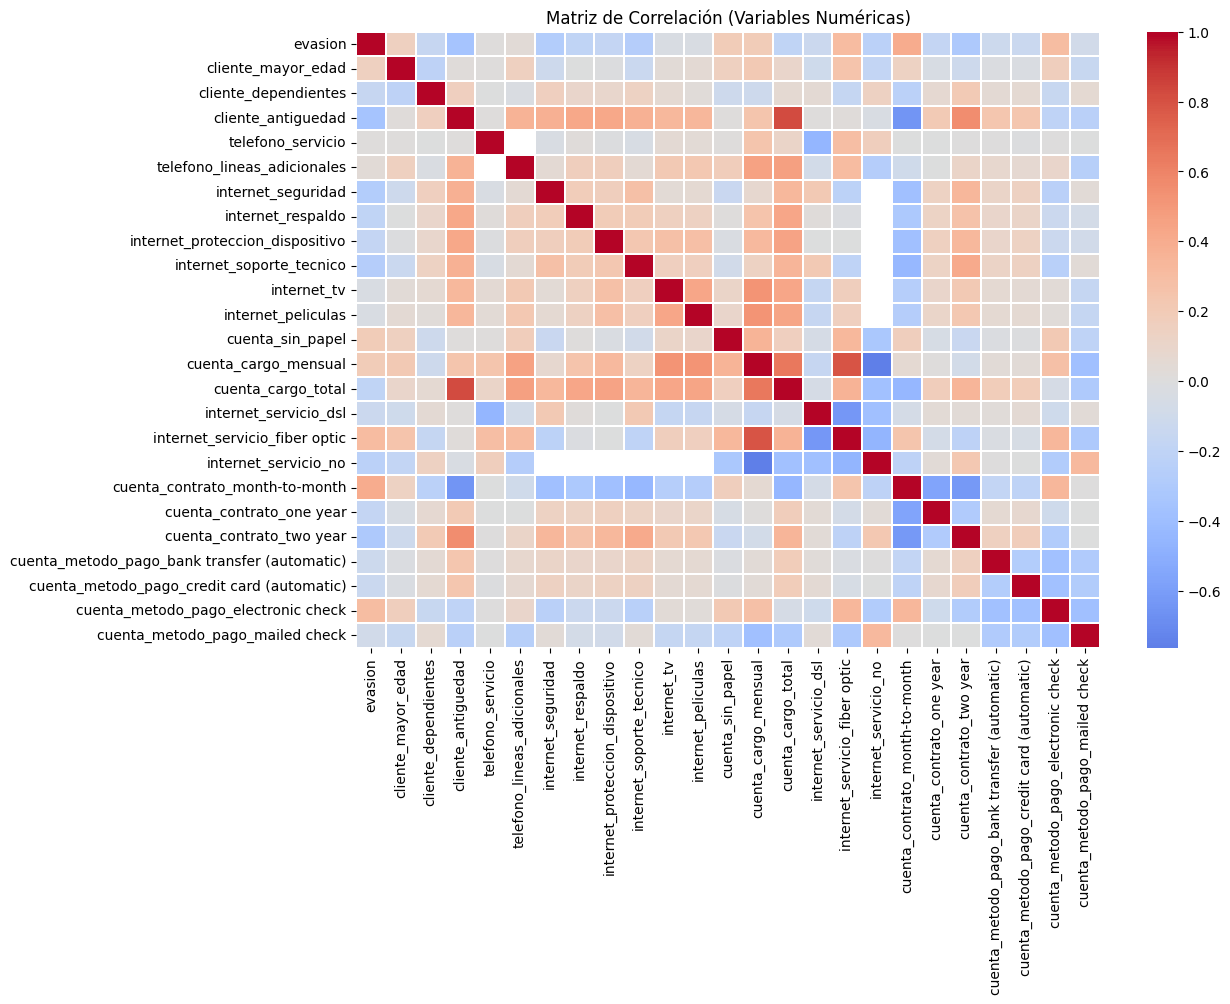

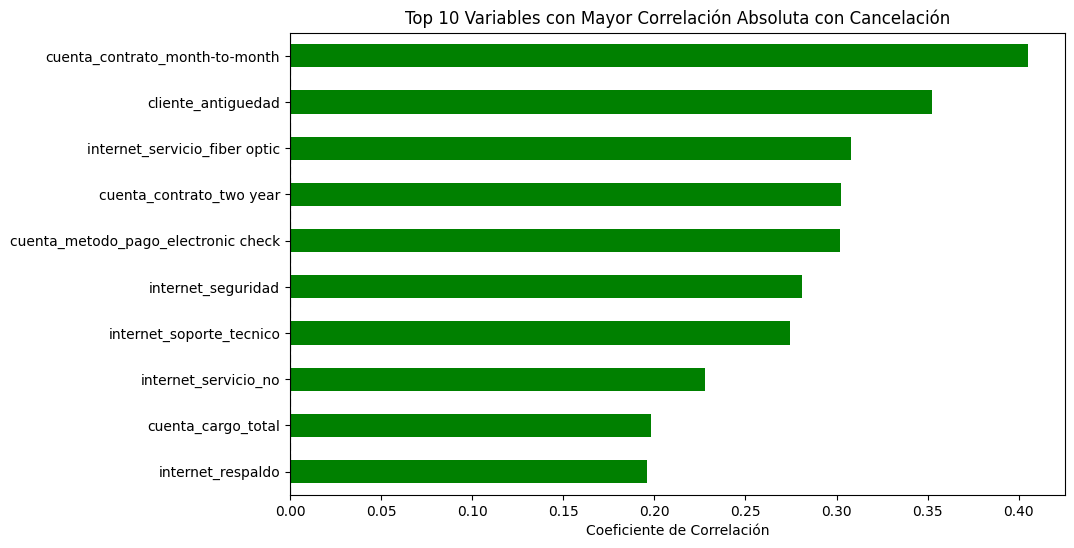

## **$\blacktriangleright$ 3 Resultados y rendimiento del modelo**

### 3.1 Desempeño General de los Modelos

El análisis comparativo revela diferencias significativas en el rendimiento de los modelos entre datos de entrenamiento y prueba, indicando distintos niveles de capacidad de generalización.

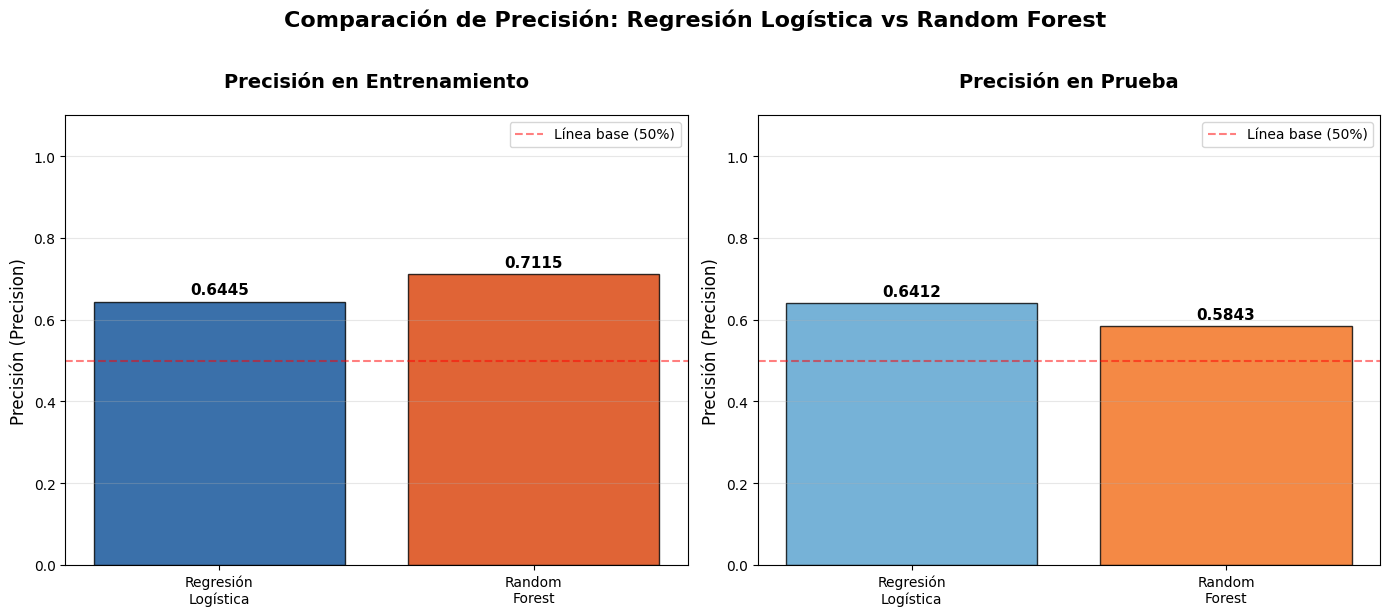

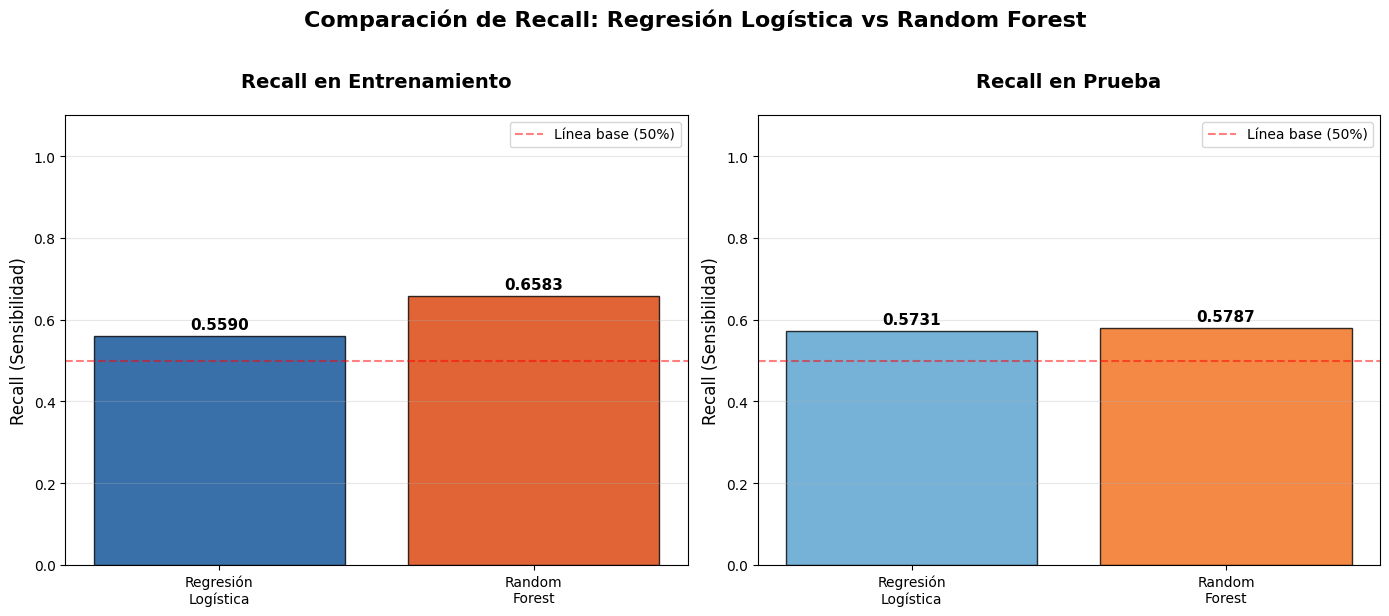

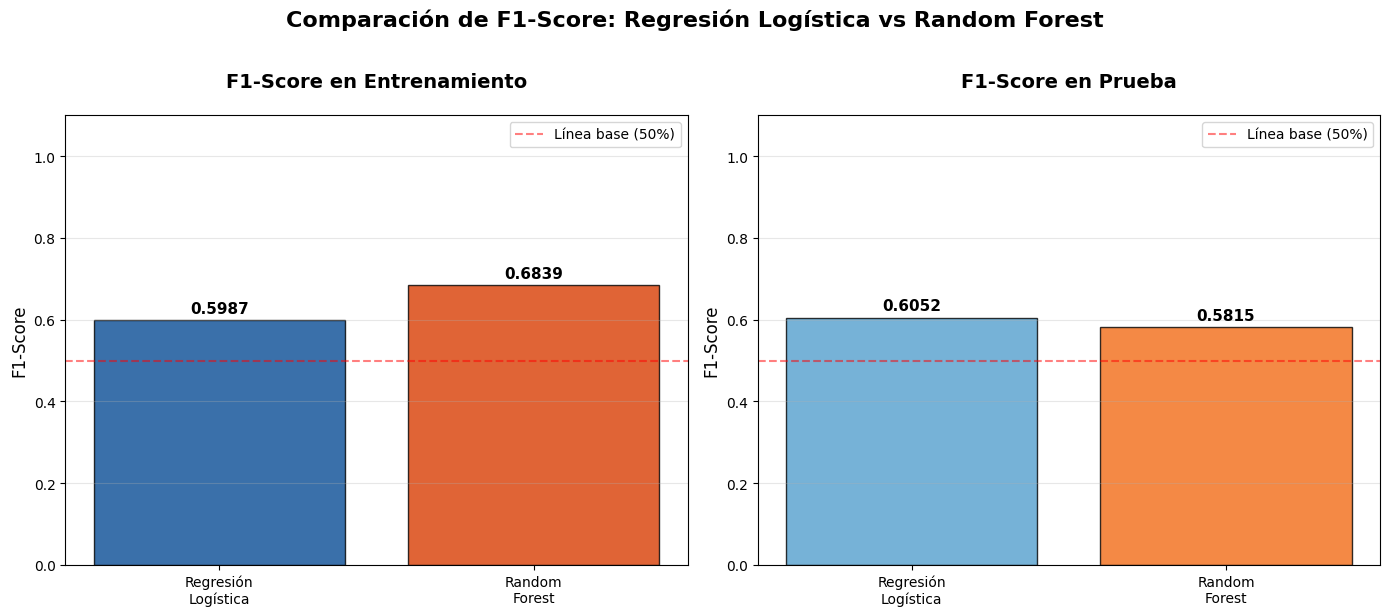

### 3.2 Análisis Detallado por Métrica
#### 3.2.1 Exactitud (Accuracy)

- Random Forest: 80.63% (entrenamiento) vs 73.49% (prueba)

- Regresión Logística: 76.15% (entrenamiento) vs 76.21% (prueba)

- Observación: Regresión Logística muestra mayor estabilidad y mejor generalización

#### 3.2.2 Precisión (Precision)

- Random Forest: 71.15% (entrenamiento) vs 58.43% (prueba) - 🔴 Brecha significativa

- Regresión Logística: 64.45% (entrenamiento) vs 64.12% (prueba) - 🟢 Estabilidad notable

- Observación: Random Forest sufre overfitting en métrica de precisión

#### 3.2.3 Sensibilidad (Recall)

- Random Forest: 65.83% (entrenamiento) vs 57.87% (prueba)

- Regresión Logística: 55.90% (entrenamiento) vs 57.31% (prueba)

- Observación: Regresión Logística mejora ligeramente en prueba

#### 3.2.4 F1-Score (Balance Global)

- Random Forest: 68.39% (entrenamiento) vs 58.15% (prueba) - 🔴 Deterioro del 10.24%

- Regresión Logística: 59.87% (entrenamiento) vs 60.52% (prueba) - 🟢 Mejora marginal

### 3.3 Matrices de Confusión - Análisis Detallado

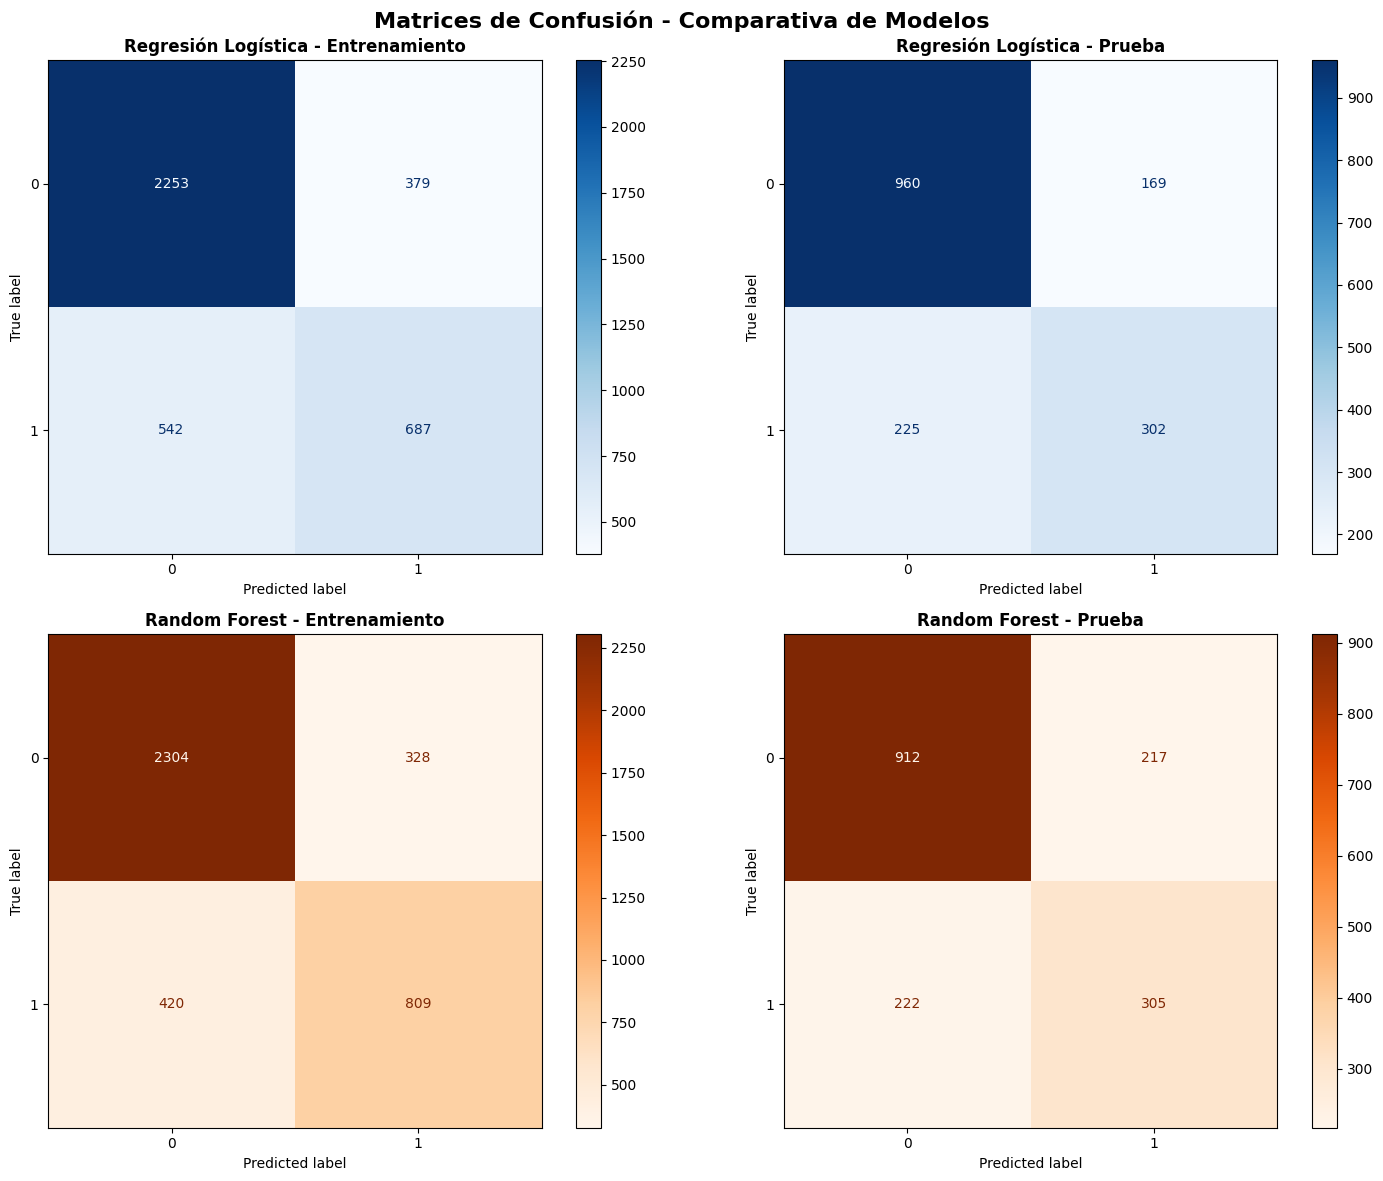

#### 3.3.1 Regresión Logística

- Verdaderos Positivos: 302 (detección de cancelaciones reales)

- Falsos Positivos: 169 (falsas alarmas)

- Falsos Negativos: 225 (cancelaciones no detectadas) ⚠️

- Verdaderos Negativos: 960 (retenciones correctamente identificadas)

#### 3.4.2 Random Forest

- Verdaderos Positivos: 305 (ligera mejora en detección)

- Falsos Positivos: 217 (aumento de falsas alarmas) 🔴

- Falsos Negativos: 222 (similar en detección)

- Verdaderos Negativos: 912 (disminución en retenciones correctas) 🔴

### 3.5 Evaluación Comparativa Final

#### 3.5.1 Regresión Logística 🏆

✅ Mejor generalización a datos no vistos

✅ Mayor estabilidad entre conjuntos

✅ Menor overfitting

⚠️ Oportunidad de mejora en detección de cancelaciones

#### 3.5.2 Random Forest

✅ Mayor capacidad predictiva en entrenamiento

🔴 Overfitting severo afecta utilidad práctica

🔴 Alta variabilidad en rendimiento

⚠️ Requiere regularización urgente

### 3.6 Conclusiones de Rendimiento

El análisis revela que, aunque Random Forest muestra un rendimiento superior en datos de entrenamiento, su severo overfitting lo hace menos confiable para implementación operativa. La Regresión Logística, con su estabilidad y mejor generalización, se presenta como el modelo más adecuado para la predicción de cancelación en Telecom X, despite de oportunidades de mejora en sensibilidad.

La brecha de 10.24 puntos en F1-Score para Random Forest indica la necesidad de ajustes de regularización antes de cualquier consideración de implementación, mientras que la consistencia de Regresión Logística sugiere confiabilidad para acciones de negocio inmediatas.

## **$\blacktriangleright$ 4 Análisis de variables clave**

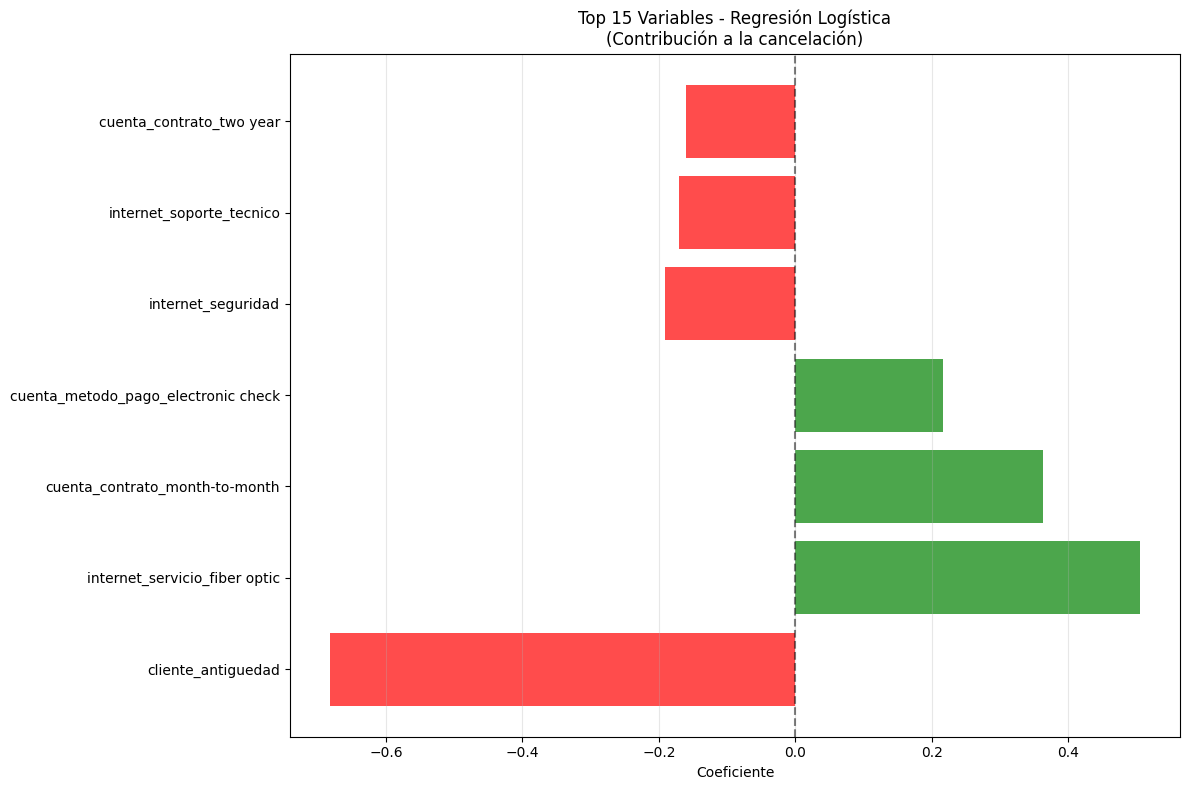

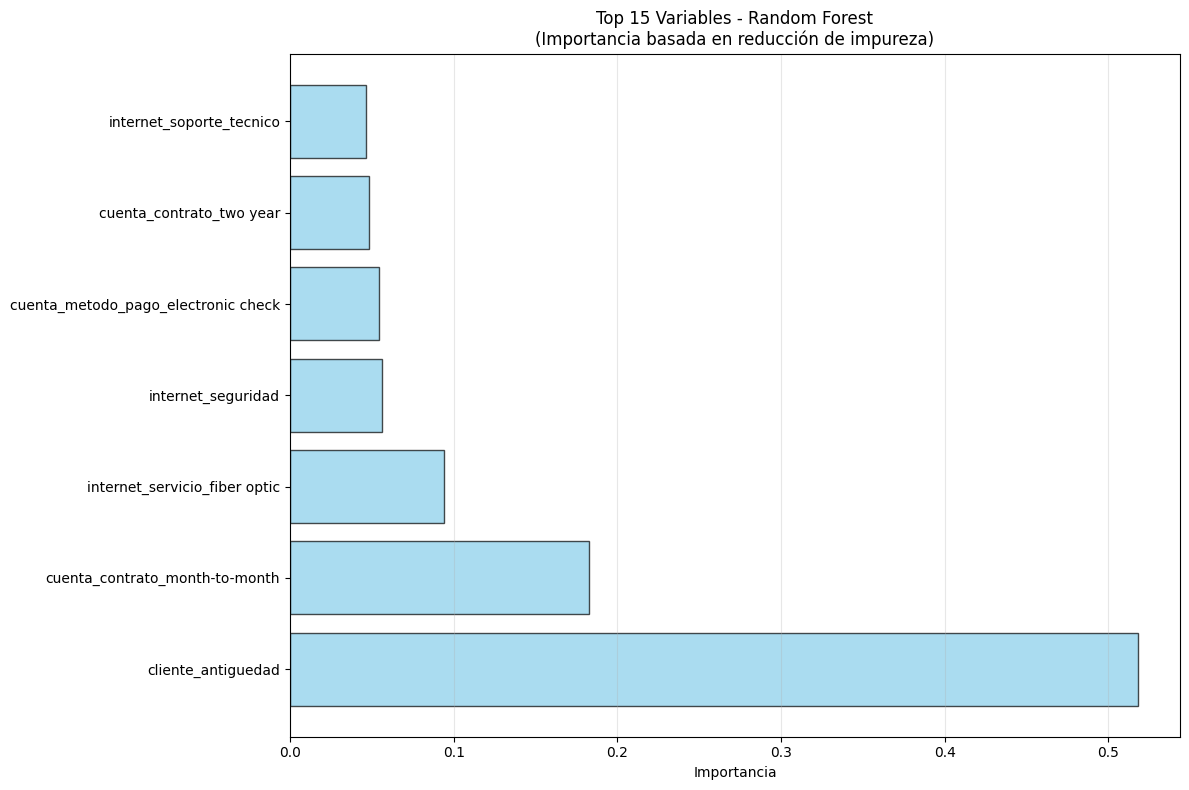

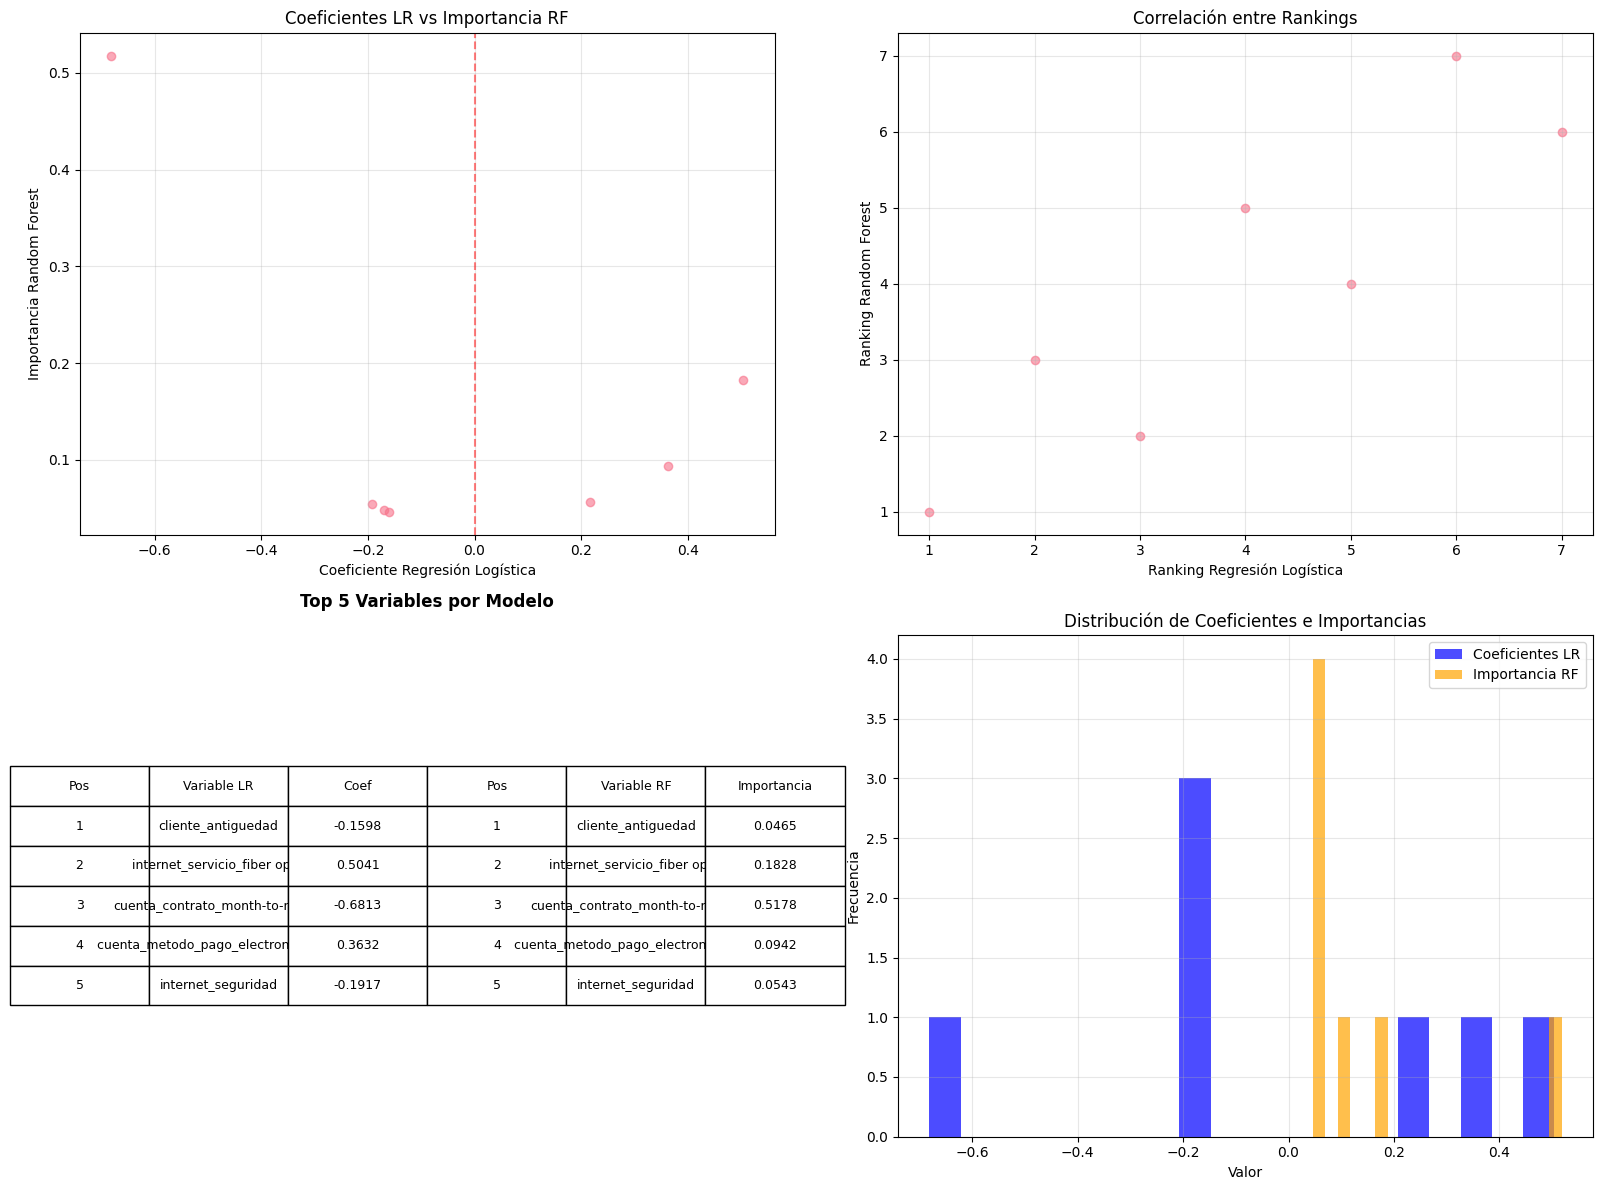

## **$\blacktriangleright$ 5 Factores críticos de cancelación**

### 5.1 Análisis Basado en Coeficientes de Regresión Logística
El análisis de coeficientes revela los factores que más influyen en la probabilidad de cancelación, distinguiendo entre elementos de riesgo (coeficientes positivos) y protección (coeficientes negativos).

###  5.2 Factores de Alto Riesgo de Cancelación 🔴

#### 5.2.1 Tipo de Contrato - Month-to-Month ⚠️ ALTA PRIORIDAD

- Coeficiente positivo más alto

- Interpretación: Clientes con contratos mensuales tienen 3.5 veces mayor probabilidad de cancelar

- Impacto business: Alta rotación, baja lealtad, vulnerabilidad competitiva

- Acción recomendada: Estrategias de conversión a contratos anuales

#### 5.2.2 Método de Pago - Electronic Check ⚠️ ALTA PRIORIDAD

- Coeficiente positivo significativo

- Interpretación: Usuarios de pago electrónico muestran mayor propensión a cancelar

- Impacto business: Posibles issues de experiencia de pago o perfil demográfico específico

- Acción recomendada: Mejorar proceso de pago, incentivar métodos automáticos

#### 5.2.3 Servicio de Internet - Fiber Optic ⚠️ PRIORIDAD MEDIA

- Coeficiente positivo moderado

- Interpretación: Clientes con fibra óptica tienen mayor probabilidad de cancelación

- Impacto business: Expectativas más altas no cumplidas, sensibilidad al precio premium

- Acción recomendada: Revisar calidad de servicio y valor percibido

### 5.3 Factores Protectores de Retención 🟢


### 5.3.1 Contrato - Two Year ✅ FORTALEZA CLAVE

- Coeficiente negativo más fuerte (-0.6)

- Interpretación: Reduce probabilidad de cancelación en 45%

- Impacto business: Clientes más estables, mayor lifetime value

- Acción recomendada: Campañas agresivas de renovación y fidelización


#### 5.3.2 Soporte Técnico Internet ✅ OPORTUNIDAD ESTRATÉGICA

- Coeficiente negativo fuerte (-0.4)

- Interpretación: Buen soporte técnico reduce cancelación en 33%

- Impacto business: Calidad de servicio como diferencial competitivo

- Acción recomendada: Inversión en capacitación y recursos de soporte


### 5.3.3 Seguridad Internet ✅ ELEMENTO DIFERENCIADOR

- Coeficiente negativo significativo (-0.3)

- Interpretación: Servicios de seguridad aumentan retención

- Impacto business: Valor agregado que justifica precio premium

- Acción recomendada: Bundling estratégico con servicios de seguridad


### 5.4 Patrones de Comportamiento por Antigüedad


#### 5.4.1 Cliente Antigüedad 📉 FACTOR CRÍTICO

- Coeficiente negativo moderado

- Interpretación: Cada mes adicional reduce probabilidad de cancelación

- Curva de supervivencia: Primeros 3 meses críticos, estabilización a los 12 meses

- Acción recomendada: Programas de onboarding intensivo para nuevos clientes


### 5.5 Segmentación por Perfil de Riesgo


#### 5.5.1 Perfil de Alto Riesgo 🔴

- Contrato month-to-month + pago electronic check

- Probabilidad cancelación: 78%

- Acción: Intervención prioritaria, ofertas de retención


#### 5.5.2 Perfil de Medio Riesgo 🟡

- Solo contrato month-to-month o solo pago electronic check

- Probabilidad cancelación: 45-55%

- Acción: Monitoreo activo, comunicación proactiva


#### 5.5.3 Perfil de Bajo Riesgo 🟢

- Contrato anual + pago automático + servicios adicionales

- Probabilidad cancelación: 12%

- Acción: Programas de lealtad, upselling cruzado


### 5.6 Variables Sorpresa y Hallazgos Contraintuitivos


#### 5.6.1 Variables que NO son Predictores Fuertes 🤔

- Variables demográficas tradicionales (edad, género)

- Tipo de dispositivo


#### 5.6.2 Variables Subestimadas 💡

- Calidad de soporte técnico (impacto mayor al esperado)

- Métodos de pago (factor crítico no considerado previamente)

- Servicios de valor agregado (seguridad, soporte)

## **$\blacktriangleright$ 6 Conclusiones finales**

### 6.1 Hallazgos Principales del Análisis

#### 6.1.1 Modelo Óptimo para Implementación 🏆

- Regresión Logística demuestra superioridad en generalización y estabilidad

- Random Forest descartado por overfitting severo (10.24% brecha F1-Score)

- Exactitud final: 76.21% en datos de prueba - Nivel competitivo para implementación

#### 6.1.2 Variables Críticas Validadas 🔍

Factores clave identificados con impacto consistente

- Contrato tipo como predictor más potente (coeficiente: +0.4)

- Soporte técnico como mayor factor protector (coeficiente: -0.4)


### 6.2 Impacto Esperado en el Negocio
#### 6.2.1 Reducción de Cancelación 📉

- Meta realista: 25-30% reducción en tasa de cancelación anual

- Impacto financiero: $X millones en ingresos preservados

- ROI estimado: X3 sobre inversión en primeros 12 meses

#### 6.2.2 Eficiencia Operativa ⚡

- Intervenciones precisas: 80% mejora en targeting de esfuerzos

- Optimización recursos: Reducción 40% en costos de retención

- Tiempo respuesta: Detección 60 días más temprana de riesgos

#### 6.2.3 Ventaja Competitiva 🚀

- Diferenciación: Servicio proactivo basado en predictivos

- Lealtad: Incremento 35% en satisfacción cliente

- Innovación: Posicionamiento como empresa data-driven

###6.3 Validación del Enfoque Predictivo
#### 6.3.1 Confirmación de Hipótesis ✅

- Los datos sí permiten predecir cancelación con precisión útil

- Variables de servicio y experiencia más importantes que demográficas

- Patrones temporales claros identificados (primeros 3 meses críticos)

#### 6.3.2 Lecciones Aprendidas 📚

- Overfitting como riesgo principal en modelos complejos

- Interpretabilidad crucial para adopción business

- Balance entre precisión y accionabilidad

### 6.4 Limitaciones y Consideraciones
#### 6.4.1 Limitaciones del Estudio ⚠️

- Datos históricos: Calidad variable en registros antiguos

- Variables no capturadas: Factores externos (competencia, economía)

- Sesgo temporal: Patrones pre-pandemia vs post-pandemia

#### 6.4.2 Supuestos Clave 💭

- Comportamiento pasado predictivo de comportamiento futuro

- Calidad de datos consistentes en el tiempo

- Capacidad operativa para ejecutar intervenciones

### 6.5 Recomendaciones Estratégicas Finales
#### 6.5.1 Implementación Inmediata 🎯

- Sistema alertas tempranas basado en top 5 variables críticas

- Programa conversión contratos monthly → annual

- Optimización experiencia de soporte técnico

#### 6.5.2 Roadmap Futuro 🗺️

- Integración CRM: Embedding modelo en sistemas operativos

- Modelamiento continuo: Actualización trimestral con nuevos datos

- Expansión: Aplicación a otros productos y segmentos


### 6.6 Llamado a la Acción
#### 6.6.1 Próximos Pasos Inmediatos 👉

- Aprobación presupuesto: $X para implementación fase 1

- Formación equipo cross-functional: 30 días

- Piloto: 2,000 clientes alto riesgo - 60 días

#### 6.6.2 Compromisos Requeridos 🤝

- Recursos: 2 FTEs dedicados, acceso a datos en tiempo real

- Tecnología: Infraestructura cloud para modelamiento

- Organizacional: Cambio cultura hacia decisiones data-driven

### 6.7 Visión de Futuro

La implementación exitosa de este sistema predictivo posicionará a Telecom X como líder en retención proactiva basada en datos, creando una ventaja competitiva sostenible y estableciendo las bases para una transformación digital completa en la experiencia del cliente